### Spotify Artists/Tracks Popularity Analysis (United States)

#### Observation & Insights 

Spotify determines artists popularity based on their tracks popularity average. However, this project pretend to research whether artists/tracks popularity are affected by other factors such as audio features like "Danceability", "Loudness "Energy", etc., as well as songs release dates, genre type, decades trends, and other key variables that will be analyzed through this notebook.

Its important to note that the scope of this analysis was limited to the United States.

##### Key questions were used in order to find trends, relationships and the understanding of the above statement.

1. The higher Genre Count per artist, the higher Artist Popularity and Artist Followers?

   Through the analysis we noticed that some artists can have one, more than one, or even have no music genre. Despite of this,    a sample of artists that have from one to 'n' number of genres were selected, and the "Genre Count" for each artist was        determined, in order to compare with the mean of popularity and number of followers. A scatter plot and a regression            analysis ("Genre Count VS Artist Followers", "Genre Count VS Artists Popularity") helped to observe that there is no            relationship between the artist popularity and how many genres each one have. Artists with only one genre, can be even more    populars than those with multiple genres.


2. Does Tracks Features (danceability, energy…) affect songs popularity? Does exist any relationship?

   A correlation matrix ("Audio Features VS Tracks Popularity Correlation Matrix") was generated in order to identify possible    relations or trends between audio features and songs popularity. Although the results didn't show strong                        correlations between themselves, a multiple regression analysis was performed in order to analyze more than one dependency;    but the results were quite the same, poor correlations between audio features and popularity. This means that no matter how    is the energy, danceability, loudness index, etc., tracks popularity will be always very subjective. Top tracks are            peridically changing and will depend on what people is listening to. See charts "Genre Count VS Artists Followers" and          "Genre Count VS Artists Popularity"
   
   
3. What is considered the most popular genre in the United States?

    Although the Spotify API doesn't have genre type by track data, as a study assumption the first genre for the top 100           artists was selected, in order to analyze the behaviour vs average artist popularity (see "Artists Count and Follower           Comparison VS Artists Main Genre" plot). From this its clear to observe that despite there are more artists within the         "Album Rock" genre, this doesn't means that is the most popular genre; the followers and popularity lines shows that Dance     Pop is the most popular genre in the United States. Validating against the artists popularity, Beyonce, its one of the most     popular artists (91), which confirms the previous insight.
   
    




In [1]:
import pandas as pd
import numpy as np
import requests
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from pprint import pprint
import os
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.stats as st
from mpl_toolkits.axes_grid1 import host_subplot
from sklearn import linear_model
import seaborn as sns
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials())

#### Data retrieval from Spotify API

Top 1000 Artists reported from "ACCLAIMED MUSIC" website were used to search information about artists tracks, features and popularity data on the Spotify API website.

In [2]:
# ACCLAIMED MUSIC URL
#Reading html tables
url_1= 'http://www.acclaimedmusic.net/061024/1948-09art.htm'
artists_1= (pd.read_html(url_1,header=0))[0]["Unnamed: 1"]

# Creating an array to read from page 2 to 5
pages= np.arange(2,6)
artists_list=[]

# For loop to store artists names into the artists_list and generating a dataframe
for page in pages:
    url_2= f"http://www.acclaimedmusic.net/061024/1948-09art{page}.htm"
    artists_df= (pd.read_html(url_2,header=0))
    artists_list.append(artists_df[0]["Unnamed: 1"])
artists= artists_1.append(artists_list)
artists.dropna(inplace=True)
artists_names= artists.reset_index()
artists_names.drop(artists_names.columns[0], axis=1, inplace=True)
artists_names.rename(columns={"Unnamed: 1": "Artist Name"}, inplace=True)
artists_names

,Artist Name
0,The Beatles
1,The Rolling Stones
2,Bob Dylan
3,David Bowie
4,Led Zeppelin
...,...
995,The Sundays
996,Herbert
997,Stephen Stills
998,Mazzy Star


In [3]:
# Adding Artist ID column to artists_names dataframe
artists_names["Artist ID"]= ""
artists_names.head()

,Artist Name,Artist ID
0,The Beatles,
1,The Rolling Stones,
2,Bob Dylan,
3,David Bowie,
4,Led Zeppelin,


Spotify API Calls

In [4]:
#counter to enumerate not found items
notfoundcount=1

# For loop throuhg artists_names dataframe 
for index, row in artists_names.iterrows():
    name= row['Artist Name']
# Using "Spotipy Library" to serach artists ID by the artist name as a search parameter
    results = sp.search(q= name, type='artist')
                 
# Adding new columns to artists_names dataframe with the retrieved data from the API    
    try:
        artists_names.loc[index,'Artist ID'] = results['artists']["items"][0]["id"]
        artists_names.loc[index,'Artist_Popularity'] = results['artists']["items"][0]["popularity"]      
        artists_names.loc[index,'Artist_Followers'] = results['artists']["items"][0]["followers"]["total"]
        artists_names.loc[index,'Artist Genre']= ",".join(results['artists']["items"][0]["genres"])
             
    except:
        
        print(f"{notfoundcount} ID not found for {row['Artist Name']}")
        artists_names.loc[index,'Artist Name']= np.NaN
        artists_names.loc[index,'Artist ID'] = np.NaN
        artists_names.loc[index,'Artist_Popularity'] = np.NaN
        artists_names.loc[index,'Artist_Followers']= np.NaN
        artists_names.loc[index,'Artist Genre']= np.NaN
        notfoundcount+=1
        pass

#Dropping NaN values
artists_names.dropna(inplace=True)
artists_names




1 ID not found for Frank Zappa/The Mothers of Invention
2 ID not found for Janis Joplin/Big Brother and The Holding Company
3 ID not found for The Buzzcocks
4 ID not found for Paul McCartney and Wings
5 ID not found for The Small Faces
6 ID not found for The Dead Kennedys
7 ID not found for Harold Melvin and The Bluenotes
8 ID not found for Richard Hell & The Voidoids
9 ID not found for The Mahavishnu Orchestra
10 ID not found for The Nitty Gritty Dirt Band
11 ID not found for The Art Ensemble of Chicago
12 ID not found for Rob Base & DJ E-Z Rock
13 ID not found for Sam the Sham and The Pharaos
14 ID not found for The Screaming Trees
15 ID not found for Michael Hurley/The Unholy Modal Rounders
16 ID not found for Rythim Is Rythim


,Artist Name,Artist ID,Artist_Popularity,Artist_Followers,Artist Genre
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,90.0,16451967.0,"beatlesque,british invasion,classic rock,merse..."
1,The Rolling Stones,22bE4uQ6baNwSHPVcDxLCe,84.0,8696874.0,"album rock,british invasion,classic rock,rock"
2,Bob Dylan,74ASZWbe4lXaubB36ztrGX,79.0,4233870.0,"album rock,classic rock,country rock,folk,folk..."
3,David Bowie,0oSGxfWSnnOXhD2fKuz2Gy,82.0,5539518.0,"album rock,art rock,classic rock,dance rock,gl..."
4,Led Zeppelin,36QJpDe2go2KgaRleHCDTp,82.0,9079479.0,"album rock,classic rock,hard rock,rock"
...,...,...,...,...,...
995,The Sundays,4nlqDmbzFzbNITaqjJv7D7,52.0,86923.0,"alternative pop,alternative rock,britpop,dream..."
996,Herbert,5zCaQxjl110XTrm4LQ1CxY,70.0,101007.0,"classical,classical performance,orchestral per..."
997,Stephen Stills,4WlSvDKaq1PA2Nr7cCIPxX,56.0,163917.0,"blues rock,classic rock,country rock,folk,folk..."
998,Mazzy Star,37w38cCSGgKLdayTRjna4W,64.0,411809.0,"alternative rock,art pop,dream pop,melancholia..."


In [5]:
#Verifying columns count
artists_names.count()

Artist Name          984
Artist ID            984
Artist_Popularity    984
Artist_Followers     984
Artist Genre         984
dtype: int64

In [6]:
# Adding a column with the first genre for each artist
for index, row in artists_names.iterrows():
    name= row['Artist Name']
    results = sp.search(q= name, type='artist')
    
    try:
        artists_names.loc[index,'Main Genre']= results['artists']["items"][0]["genres"][0]
    except:
        artists_names.loc[index,'Main Genre']= np.NaN
        
        
    

In [7]:
# Saving artists_names to a csv file
artists_names.to_csv("input/Artistfile.csv", index=False,header=True)
#Validating column count
artists_names.count()

Artist Name          984
Artist ID            984
Artist_Popularity    984
Artist_Followers     984
Artist Genre         984
Main Genre           960
dtype: int64

In [8]:
# Creating a DataFrame seeking by Artist ID and retrieving the following columns
top10_tracks= pd.DataFrame(columns=["Artist","Artist ID","Tracks","Track ID","Release Date","Track Duration","Popularity"])
top10_tracks


,Artist,Artist ID,Tracks,Track ID,Release Date,Track Duration,Popularity


In [9]:
#Counter to iter through the empty dataframe rows
counter=1

#For loope to iter through artists_names dataframe
for index, row in artists_names.iterrows():
    artist_id= row['Artist ID']
    artist_top_tracks = sp.artist_top_tracks(artist_id)
    
#json section to iter within it, in order to find the top 10 songs for each artist ID     
    track = artist_top_tracks['tracks'][:10]

    for tracks in range(len(track)):    
        try:
            top10_tracks.loc[counter,'Tracks'] = track[tracks]["name"]
            top10_tracks.loc[counter,'Artist'] = track[tracks]["album"]["artists"][0]["name"]
            top10_tracks.loc[counter,'Artist ID'] = track[tracks]["album"]["artists"][0]["id"]
            top10_tracks.loc[counter,'Track ID'] = track[tracks]["id"]
            top10_tracks.loc[counter,'Release Date'] = track[tracks]['album']['release_date']
            top10_tracks.loc[counter,'Track Duration'] = track[tracks]['duration_ms']
            top10_tracks.loc[counter,'Popularity'] = track[tracks]['popularity']
            
            counter+=1
        
        except:
            
            pass
    
top10_tracks    


,Artist,Artist ID,Tracks,Track ID,Release Date,Track Duration,Popularity
1,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Here Comes The Sun - Remastered 2009,6dGnYIeXmHdcikdzNNDMm2,1969-09-26,185733,83
2,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Come Together - Remastered 2009,2EqlS6tkEnglzr7tkKAAYD,1969-09-26,259946,78
3,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Let It Be - Remastered 2009,7iN1s7xHE4ifF5povM6A48,1970-05-08,243026,78
4,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Yesterday - Remastered 2009,3BQHpFgAp4l80e1XslIjNI,1965-08-06,125666,77
5,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Hey Jude - Remastered 2015,0aym2LBJBk9DAYuHHutrIl,2000-11-13,425653,76
...,...,...,...,...,...,...,...
9710,Blind Lemon Jefferson,6EsuMifB8c5rm5P2DdjiLe,Future Blues,7cAXWkbpR8Szb06AFXhAmJ,2013-08-27,180773,15
9711,Blind Lemon Jefferson,6EsuMifB8c5rm5P2DdjiLe,Match Box Blues,4dBUAjMjmAednMqt8PU4AI,1992-01-01,187400,14
9712,Blind Lemon Jefferson,6EsuMifB8c5rm5P2DdjiLe,Rabbit Foot Blues,69xrgBndFd3zs6kqVZ8LDO,1991,179095,13
9713,Blind Lemon Jefferson,6EsuMifB8c5rm5P2DdjiLe,That Black Snake Moan,0I4nvtM87RCvywkmeinsqI,1992-01-01,178640,12


In [10]:
# Adding Audio Features by Track ID
for index, row in top10_tracks.iterrows():
    try:
        track_id = row["Track ID"]
        track_data = sp.audio_features(track_id)
        top10_tracks.loc[index,"Danceability"] = track_data[0]['danceability']
        top10_tracks.loc[index,"Energy"] = track_data[0]['energy']
        top10_tracks.loc[index,"Key"] = track_data[0]['key']
        top10_tracks.loc[index,"Loudness"] = track_data[0]['loudness']
        top10_tracks.loc[index,"Mode"] = track_data[0]['mode']
        top10_tracks.loc[index,"Speechiness"] = track_data[0]['speechiness']
        top10_tracks.loc[index,"Acousticness"] = track_data[0]['acousticness']
        top10_tracks.loc[index,"Instrumentalness"] = track_data[0]['instrumentalness']
        top10_tracks.loc[index,"Liveness"] = track_data[0]['liveness']
        top10_tracks.loc[index,"Valence"] = track_data[0]['valence']
        top10_tracks.loc[index,"Tempo"] = track_data[0]['tempo']
                            
        print(f" Processing Track ID: {row['Track ID']}")
        
    except:
        top10_tracks.loc[index,"Danceability"]=np.NaN
        top10_tracks.loc[index,"Energy"]= np.NaN
        top10_tracks.loc[index,"Key"]= np.NaN
        top10_tracks.loc[index,"Loudness"]= np.NaN
        top10_tracks.loc[index,"Mode"]= np.NaN
        top10_tracks.loc[index,"Speechiness"] = np.NaN
        top10_tracks.loc[index,"Acousticness"] = np.NaN
        top10_tracks.loc[index,"Instrumentalness"] = np.NaN
        top10_tracks.loc[index,"Liveness"] = np.NaN
        top10_tracks.loc[index,"Valence"] = np.NaN
        top10_tracks.loc[index,"Tempo"] = np.NaN
        
        pass
top10_tracks.head(20)



 Processing Track ID: 6dGnYIeXmHdcikdzNNDMm2
 Processing Track ID: 2EqlS6tkEnglzr7tkKAAYD
 Processing Track ID: 7iN1s7xHE4ifF5povM6A48
 Processing Track ID: 3BQHpFgAp4l80e1XslIjNI
 Processing Track ID: 0aym2LBJBk9DAYuHHutrIl
 Processing Track ID: 5jgFfDIR6FR0gvlA56Nakr
 Processing Track ID: 5ZBeML7Lf3FMEVviTyvi8l
 Processing Track ID: 4pbG9SUmWIvsROVLF0zF9s
 Processing Track ID: 3KfbEIOC7YIv90FIfNSZpo
 Processing Track ID: 7DD7eSuYSC5xk2ArU62esN
 Processing Track ID: 63T7DJ1AFDD6Bn8VzG6JE8
 Processing Track ID: 7HKez549fwJQDzx3zLjHKC
 Processing Track ID: 2PzU4IB8Dr6mxV3lHuaG34
 Processing Track ID: 6H3kDe7CGoWYBabAeVWGiD
 Processing Track ID: 1Ud6moTC0KyXMq1Oxfien0
 Processing Track ID: 77oU2rjC5XbjQfNe3bD6so
 Processing Track ID: 52dm9op3rbfAkc1LGXgipW
 Processing Track ID: 1GcVa4jFySlun4jLSuMhiq
 Processing Track ID: 61UuPxxYUvacEH6SHIK3sU
 Processing Track ID: 2aQHcpFfrUoTc9CtxPGotZ
 Processing Track ID: 6HSXNV0b4M4cLJ7ljgVVeh
 Processing Track ID: 3AhXZa8sUQht0UEdBJgpGc
 Processin

 Processing Track ID: 4Y7fEQ4PAzhlLnLviRw2P4
 Processing Track ID: 2EFtUP7BmsjHzhQqI6A4rp
 Processing Track ID: 7DqktFsRwJa0XDFPMjV1xJ
 Processing Track ID: 3ZPLFD6mbw6hhu3g6S4EGl
 Processing Track ID: 1Y8L4hT9CDJH6ROK2XGxgO
 Processing Track ID: 55XOFkEEYgeqxZkQfEt97X
 Processing Track ID: 1h2xVEoJORqrg71HocgqXd
 Processing Track ID: 2eF8pWbiivYsYRpbntYsnc
 Processing Track ID: 6RNDeRnWsRMjPdNVgupZCs
 Processing Track ID: 4kP69y3GKHi9tXckfgp4bK
 Processing Track ID: 4pNiE4LCVV74vfIBaUHm1b
 Processing Track ID: 0n2pjCIMKwHSXoYfEbYMfX
 Processing Track ID: 6RANU8AS5ICU5PEHh8BYtH
 Processing Track ID: 0Dm43YLUlGdePpSbI1ct8h
 Processing Track ID: 687YZan9Gol1UVvbpUSO6Y
 Processing Track ID: 0dMd4rilfd6gPbXaLpNYhu
 Processing Track ID: 6mFkJmJqdDVQ1REhVfGgd1
 Processing Track ID: 4gMgiXfqyzZLMhsksGmbQV
 Processing Track ID: 5HNCy40Ni5BZJFw1TKzRsC
 Processing Track ID: 0vFOzaXqZHahrZp6enQwQb
 Processing Track ID: 3TO7bbrUKrOSPGRTB5MeCz
 Processing Track ID: 2ctvdKmETyOzPb2GiJJT53
 Processin

 Processing Track ID: 5lA3pwMkBdd24StM90QrNR
 Processing Track ID: 7woW97CfcWaKtuC6W5BP2K
 Processing Track ID: 5e50NiIlOc2YJIftHzoehd
 Processing Track ID: 2GTCK8zYHwkcu0i0jtKjFz
 Processing Track ID: 62vDrkBEyJYEOFj1ScBqM7
 Processing Track ID: 3DmW6y7wTEYHJZlLo1r6XJ
 Processing Track ID: 2vI4SxtYqAQD5h1nSrqfKM
 Processing Track ID: 2AY1UAimvTqjJC8vDJsOyy
 Processing Track ID: 7dNwJbsT0sg1le5kVugGJb
 Processing Track ID: 5C0ivQMxes2lWuOANhvVAm
 Processing Track ID: 74wEiOpnvCe1tCTWKGSYta
 Processing Track ID: 2uhMYJq2TODWBuZhHRrdWy
 Processing Track ID: 3LoDeIbiR12sAznmpNEmKA
 Processing Track ID: 6ui6l3ZNvlrGQZArwo8195
 Processing Track ID: 2mKj8Em0GLFu8I78yM1CfU
 Processing Track ID: 2e4RcQohKWo8oZIUfjxiGo
 Processing Track ID: 21MwEJ8tHezcPy77BaELJ6
 Processing Track ID: 17YNjZoMHOoS8BM1fcgiBk
 Processing Track ID: 4GtIKUB1Q5O65ofahYPRfX
 Processing Track ID: 41Tk8SBbrIGxkI9xOf4LQr
 Processing Track ID: 0NHbdY5yC3ItJi2olhm7fK
 Processing Track ID: 6jjASY7DtqLdM0zJbAQcnX
 Processin

 Processing Track ID: 2EEinN4Zk8MUv4OQuLsTBj
 Processing Track ID: 6wVViUl2xSRoDK2T7dMZbR
 Processing Track ID: 1UVll7jjUlqSGxCZ6uXVaD
 Processing Track ID: 1c4OpZ2G1MEcEKSknUZjdD
 Processing Track ID: 2M4PVaTJGjXV91X8HAVQEx
 Processing Track ID: 0eKRwDBVWxCXWpLYFYrbd1
 Processing Track ID: 4NHBCFq7uaQGUW2P7yg6hE
 Processing Track ID: 2Xs7CP4Gw8wJ8qX8fkrCAB
 Processing Track ID: 2xar08Fq5xra2KKZs5Bw9j
 Processing Track ID: 5yQFVCQkupKqTJecbXA7qT
 Processing Track ID: 5P11rW6aJErF37MTfRZS31
 Processing Track ID: 5yQ9iMZXGcr5rlO4hoLsP4
 Processing Track ID: 79nJj5dMyTsUzKvN5jUXsJ
 Processing Track ID: 7DJsL4jyXA39GDiHFQYQ0t
 Processing Track ID: 4UpiGzkVYkUieq1JTwFp5m
 Processing Track ID: 76MSB9fAR5jXVcBXdK5xMy
 Processing Track ID: 2htH7r8oqqEwp3BB6oh2cU
 Processing Track ID: 0oQtjAjUeksVd9gHE5fl02
 Processing Track ID: 1JSTJqkT5qHq8MDJnJbRE1
 Processing Track ID: 3EYOJ48Et32uATr9ZmLnAo
 Processing Track ID: 1oYYd2gnWZYrt89EBXdFiO
 Processing Track ID: 44aTAUBF0g6sMkMNE8I5kd
 Processin

 Processing Track ID: 7LRMbd3LEoV5wZJvXT1Lwb
 Processing Track ID: 2d4e45fmUnguxh6yqC7gNT
 Processing Track ID: 0C80GCp0mMuBzLf3EAXqxv
 Processing Track ID: 69QHm3pustz01CJRwdo20z
 Processing Track ID: 7nemcVsXVFZF01iqpIIo2Y
 Processing Track ID: 4feXJ5IC3avXsVW9WNFSag
 Processing Track ID: 10igKaIKsSB6ZnWxPxPvKO
 Processing Track ID: 5BIMPccDwShpXq784RJlJp
 Processing Track ID: 54bm2e3tk8cliUz3VSdCPZ
 Processing Track ID: 2lF8jQFhIjpmQa501sYXxR
 Processing Track ID: 0LAcM6I7ijW4VVW0aytl1t
 Processing Track ID: 3ZpWy5rBZv2aLQAldnmTsP
 Processing Track ID: 51YZAJhOwIC5Gg3jMbAmhZ
 Processing Track ID: 1Ug98CRiQYu7wiSym4uLY4
 Processing Track ID: 0dqGfCMAGyDgpUAgLNOjWd
 Processing Track ID: 5DrNFzZZZVfXaEZCaceKnp
 Processing Track ID: 7Jd0MqZq15T4pDWts2G6Yl
 Processing Track ID: 1vgSaC0BPlL6LEm4Xsx59J
 Processing Track ID: 62OfxRiHmEDT9qhTTtgt0A
 Processing Track ID: 3bCmDqflFBHijgJfvtqev5
 Processing Track ID: 50mwGp3PgKoZldhBvfy2cf
 Processing Track ID: 5Q5MFVjUWVNgb7XBerPdbQ
 Processin

 Processing Track ID: 4v2rkl1mC3zVAz0nXMx9r4
 Processing Track ID: 5QIbR39hAEDIOkr4ggh4xc
 Processing Track ID: 6F2vo4sxRNQ58VYe3pdiaL
 Processing Track ID: 0UFLbtupYWaDGMS4io94Ml
 Processing Track ID: 2L93TdW2GMue1H2zlkt30F
 Processing Track ID: 7yzbimr8WVyAtBX3Eg6UL9
 Processing Track ID: 77K5TB5KZmDZCoJCdd1NvE
 Processing Track ID: 14CsqOaDkOkrZ49UJLtuOJ
 Processing Track ID: 5zb7npjQqoJ7Kcpq4yD9qn
 Processing Track ID: 3mFzIFFFmEXTQs6BDAK2ZZ
 Processing Track ID: 2DkpoHJ1h88e9dyc6SFIm2
 Processing Track ID: 5atFAXIgMXP378op4FaxBm
 Processing Track ID: 60s0QWaOZ2UTzqdIHBCt3x
 Processing Track ID: 4krhCfJg0znykZoyjeMXRe
 Processing Track ID: 7LbfuQVct78YoghmoPtsQ8
 Processing Track ID: 5ZLzl6T8JwqMTMdoE0nCbU
 Processing Track ID: 1OE5l6sedVcIFELMuxQOPI
 Processing Track ID: 7M7AwtGvWdMYudqx5Iuh1m
 Processing Track ID: 3euDGpS2R0NC2Xssqxohva
 Processing Track ID: 1I6l01BaBgBCVkfQCpIlR6
 Processing Track ID: 1lNRVjK8MukRZpeurYssIx
 Processing Track ID: 0mJQlCl9YgxW7kyeltNiVk
 Processin

 Processing Track ID: 790YJcgHlN3SaosQCHlWzn
 Processing Track ID: 7dblNGnRXEBrVJunazs2U5
 Processing Track ID: 11fNLqDB47gMKj7BHhR2Qr
 Processing Track ID: 6oRHRkQigTzJ3KwpO3XOV6
 Processing Track ID: 3lWuagNhAzcqOikD5KnBku
 Processing Track ID: 2erTdgDOZmjJNaNhjhWXhJ
 Processing Track ID: 3NUXLtK8UGdD8TvZ12b4dD
 Processing Track ID: 0Tjdbd83LEAWrA0atsXMDJ
 Processing Track ID: 27bw4i8LnECzVlbMZ4kFHw
 Processing Track ID: 4FrMb1ckGBrhARbHySQKx5
 Processing Track ID: 6hgY1l6EqrfrHRNrxwKRiK
 Processing Track ID: 2stkLJ0JNcXkIRDNF3ld6c
 Processing Track ID: 7tSODhfDkv0JEhkSMYSIBS
 Processing Track ID: 5e0O7MjhNHq9G67qDFM8nR
 Processing Track ID: 446imtjItCGwAmXySZG2FS
 Processing Track ID: 0tFlZBBAQFBwAHKpTOOv2Y
 Processing Track ID: 5JypFayfT1V5OG4xJ8q7jK
 Processing Track ID: 53yBKCc5S7u8zzutqepkiT
 Processing Track ID: 3oFSbVCS8conK9GwJWOSH6
 Processing Track ID: 2m1mYan1nvOMORlb12q2Y9
 Processing Track ID: 1pJHnQCWY4hn8ZWuNJ75jt
 Processing Track ID: 58PSYdY0GFg0LFb2PxYk4T
 Processin

 Processing Track ID: 6eLL7QTdMWdhhG4i3jHDR9
 Processing Track ID: 6U7QjXYOaLJ741cIWPBTyN
 Processing Track ID: 44pN9jfSqY3d3lrKuv3QeN
 Processing Track ID: 5yqVF4y7dq6AgnNCHnHZEA
 Processing Track ID: 7FMXSSzIRW8aJwUPfzXsa2
 Processing Track ID: 56SVBTiWKPVwqNxiNkCpKS
 Processing Track ID: 3HZMEIZY9Z6GdhPaG5bAK2
 Processing Track ID: 7Me0vOSlJfaPY7Pc4GeItd
 Processing Track ID: 2OaXmeYBJ0hcTmS3kxjJOx
 Processing Track ID: 3x0iCzjgf0v9lnwvAhU9P2
 Processing Track ID: 7dNpe8vvDnTGWgURDphlVJ
 Processing Track ID: 5kRGLbl5wemYO1zFPjyJcz
 Processing Track ID: 7wfvl1kiZJNvhx6HNTyefX
 Processing Track ID: 4aD0RFy4Y6i8eToTXdizZZ
 Processing Track ID: 1pimWzwUERYZbAFr5tL0Xl
 Processing Track ID: 6ZHa4WN0lqua4sQHRQFpkc
 Processing Track ID: 3aPjLBWsrqTetCn3QcLSuK
 Processing Track ID: 5SAUIWdZ04OxYfJFDchC7S
 Processing Track ID: 4gVTozEmzwAUXpwj3jEetX
 Processing Track ID: 2JhJOPGvtqMpj5RQC8cIYf
 Processing Track ID: 4aU82r5G2KTUh3HmPHCbM1
 Processing Track ID: 5TrfusgKC1BYic5LaWCoKm
 Processin

 Processing Track ID: 5SCB7L1alKg7ZEeSw7Sq9f
 Processing Track ID: 2WjW8DjQru6Ic4KvYDqLys
 Processing Track ID: 03IOfDZjjJNG8lDrpEB0ZS
 Processing Track ID: 503OTo2dSqe7qk76rgsbep
 Processing Track ID: 4LwU4Vp6od3Sb08CsP99GC
 Processing Track ID: 7iXF2W9vKmDoGAhlHdpyIa
 Processing Track ID: 4YtoipFgf4k0AfD17ZfD5X
 Processing Track ID: 70ATm56tH7OrQ1zurYssz0
 Processing Track ID: 1SWVDBtw6h3tm9OehOkDhv
 Processing Track ID: 0Ed7MeXx64f6OcIuoTRCg1
 Processing Track ID: 04fX3oTJm5Zucg3Uf9aix0
 Processing Track ID: 1pjDKRg5WddCDSlG5PXcKy
 Processing Track ID: 1U8Ho1nOzKXYDvfigOuHG4
 Processing Track ID: 2r7y4HANK7b9KVZfz0g4Uq
 Processing Track ID: 6Ubz7S4IFSWVxlkMiRyMIK
 Processing Track ID: 0uJyE3M3ecGZgzltsQKs3a
 Processing Track ID: 2couS7LmXsbTaTJWVzk1KS
 Processing Track ID: 37pFLuNVnAJQL9ysRoKTdy
 Processing Track ID: 0lmbYpumTlipEY0mUffz9Z
 Processing Track ID: 73kW4XDVEv9Vuv7eVN7BdP
 Processing Track ID: 29QwcZbRpGj68LCxlQQabs
 Processing Track ID: 0EhVoKEr4kITiSbrdTpmKE
 Processin

 Processing Track ID: 4rEle6gif1VERA41tjOTIq
 Processing Track ID: 2htrobARQSYCNg46T1HO5D
 Processing Track ID: 1OFjv0Cq2JeK3FPvPG98rJ
 Processing Track ID: 4y1m9racCzrqlAZxw03UA9
 Processing Track ID: 4ZxowZeQWTSdnEkeOunyad
 Processing Track ID: 0NNKkdcablz5mAdnzz8U40
 Processing Track ID: 2gLJXznQp4kGsVz8BptfHS
 Processing Track ID: 5Ahcvq8xtnJxCfm9jtpURO
 Processing Track ID: 0gyXoJZ5H4fj5kE2sytVhI
 Processing Track ID: 5oPUBUzrAnwvlmMzl1VW7Y
 Processing Track ID: 1GTPxha6U7x9ElVxkQw3OK
 Processing Track ID: 3tehrxZR8eaANHov4cEctL
 Processing Track ID: 3CL3PBAaY6l0ZuQ3EDw4cl
 Processing Track ID: 144adL7pGHEWRwute2wxzZ
 Processing Track ID: 1qHKYuAeVf0XISmgwaacHf
 Processing Track ID: 1dWteEXxzhg5xGNZZ6dJQX
 Processing Track ID: 1j6lrR4BzRGKwvAPfrIcbf
 Processing Track ID: 2sifRHahNmhTR7a3BjKc9u
 Processing Track ID: 6j33lrIVcHFlIAhfWN0poU
 Processing Track ID: 0sCeNwt8xRCMR4NhKpMyBe
 Processing Track ID: 2zQl59dZMzwhrmeSBEgiXY
 Processing Track ID: 3qQVUOHJdgIFWJd0jrG9GE
 Processin

 Processing Track ID: 1pOIpxfrQ8AszXZdKR3aH3
 Processing Track ID: 3vQir0wkIdLGq3Lc4V6J2y
 Processing Track ID: 6phmKeRhJUsiSBJgMkgjg8
 Processing Track ID: 52IuMfbQa9aqRPz2oYPAI8
 Processing Track ID: 0Pl3n0jmoL4dboyQ1v9YIn
 Processing Track ID: 4fukZMkYV1JgJ68NegVLtN
 Processing Track ID: 3OMqeZU9lQGimMwMjPvBsp
 Processing Track ID: 12G1TYIfbpvC0mdFFn4Pbg
 Processing Track ID: 3mtIUX9LrCpIUiAAv9SD4a
 Processing Track ID: 2uwN3PDudlRkAKE3wA0OqJ
 Processing Track ID: 5AMrnF761nziCWUfjBgRUI
 Processing Track ID: 3XtkcPHbYX0BImTQLlbSVN
 Processing Track ID: 1Q0sk7b7PAGjgC3R5zyuWt
 Processing Track ID: 6WuRo5MdVrpKCl6lkKIAlp
 Processing Track ID: 4xfAVJL8R7mVYbDk8a9xOY
 Processing Track ID: 6tPiCU4LFsXUQPRIykOAnl
 Processing Track ID: 3pwj90XGAD6I0jO3q6fkCx
 Processing Track ID: 6mfy4Q8P3fVXMeuD5d19oi
 Processing Track ID: 6EPRKhUOdiFSQwGBRBbvsZ
 Processing Track ID: 1Krtfh550kyhfWPcRp6SnD
 Processing Track ID: 4W2CRPuOl8wN3aR7QmOmQE
 Processing Track ID: 3zeQSYzaN9kLVypKWr6yUi
 Processin

 Processing Track ID: 5RXjEF5tqZFAsiPXZrcpnu
 Processing Track ID: 1wOxTOMMt5N7aw6kBItAW4
 Processing Track ID: 7EVWhR9VblkTa5iZDQkacz
 Processing Track ID: 3VcJYPMFO0Cq4ixhjZD7i6
 Processing Track ID: 6cr6UDpkjEaMQ80OjWqEBQ
 Processing Track ID: 423o3ZHIaBtGXyhF1uH41a
 Processing Track ID: 4yqtwO7MQIIXqoiRBPHAgR
 Processing Track ID: 26tWBbtjvgi0tipRL2VQ2X
 Processing Track ID: 57MflfPN3ObQQAQtPUp0WF
 Processing Track ID: 4UK1g9Z1lWedkmIQuSyCe5
 Processing Track ID: 3pGBIgFdfdnjtHDJR4nbrR
 Processing Track ID: 4Yy5d21CJvXQ8cOuaTiCRD
 Processing Track ID: 3mwFncaI2HBczQ92GP9MQF
 Processing Track ID: 06ku5BBS2HufqSDVkcSR15
 Processing Track ID: 3nvuPQTw2zuFAVuLsC9IYQ
 Processing Track ID: 1SquBBWJ2qIUAt6GiKZpsq
 Processing Track ID: 1SQJoU0N3uVIcoJy9PjJFB
 Processing Track ID: 6m3kJ6d7Ypd1eoBoGP2qZN
 Processing Track ID: 6TYckNar2KHob86P5JNETu
 Processing Track ID: 6iGBOnPuTpSvufBhWp5gwz
 Processing Track ID: 0xGKuYwIum3qUbJ2NgnwY8
 Processing Track ID: 6FGr6p4zu4hkXuLg70f00r
 Processin

 Processing Track ID: 5oFJJtzN2pyedrtcwSKdGq
 Processing Track ID: 4jhsuQCUCJKA5f0bXb6XdJ
 Processing Track ID: 2iWTHXaFtRSMhd5OLpYD7f
 Processing Track ID: 6zajKxvei3b3xmXNRLGJbR
 Processing Track ID: 03d3DCqwvt65Orfdomjs6e
 Processing Track ID: 4k2CdsRopiwCKqO6rOSiVY
 Processing Track ID: 3wowK80ug94yqlI86A9Ej9
 Processing Track ID: 35JhxrwW2bBAiMcnrmuLEN
 Processing Track ID: 6Vipnok4Hf5xpH6eJaxvr0
 Processing Track ID: 3SzoVeS9Eaxt6dmfXF0fPo
 Processing Track ID: 4nfSUYBf9XJxctw71Q17FZ
 Processing Track ID: 5b7OgznPJJr1vHNYGyvxau
 Processing Track ID: 3HXdy2r9RzawSwqQCwkjnP
 Processing Track ID: 7sO8fLoq7H3er7C24UtLiF
 Processing Track ID: 1ywNBYgKTyu9VpNGkeEbmG
 Processing Track ID: 3Y0LpU5kqQ3vSZvwcGjl1M
 Processing Track ID: 0a545c4gOsyYupVvliDOy0
 Processing Track ID: 0jXSghMAEE2ImajlWNBoiT
 Processing Track ID: 24Mi1vVBzYLMZ26gwhnOIE
 Processing Track ID: 4EWfHtzK5z5yEdprj6JYKb
 Processing Track ID: 7uv1H2DoWiGnxTWMV6B5qV
 Processing Track ID: 71D4LseR0RADPbyvMeTIHR
 Processin

 Processing Track ID: 3YU9X8ryOR20beT7wOlDIJ
 Processing Track ID: 7LDTB4kVmrLCU5TqKjZnzm
 Processing Track ID: 0spN4UlSI0X6YSYCWpSzgz
 Processing Track ID: 6TPMFSJFmyIohTM5El90Po
 Processing Track ID: 7y5mfSJLUmPYmrI5hcCWnT
 Processing Track ID: 3FNOGabABzedvOb3B24M64
 Processing Track ID: 5g9w5jqvJILKQxoDFoAkjl
 Processing Track ID: 4lWi8GnQbYUmX9j0Y1Cx9u
 Processing Track ID: 1TvXbNhFRbrp1SIenQ2NHM
 Processing Track ID: 33kTpZiXOEs9yQrSzn0cV5
 Processing Track ID: 3ccsKRKg0NEfiDaeYnIauK
 Processing Track ID: 1Ekf4LfkzpVbwoUawE9R3E
 Processing Track ID: 1NVq4MTXJVqJ1Dw7LJ6KD4
 Processing Track ID: 6EUSmVljC3J77F8SHpthqm
 Processing Track ID: 2audHw8H7pcDViQBXAufEZ
 Processing Track ID: 1bnCl0lurjeZk8wtddHFYI
 Processing Track ID: 616HBAgKMaB5uQgWa594Um
 Processing Track ID: 7jWbXvrgdbkajU8L28ahn5
 Processing Track ID: 2xYQTU2bbg6WVAmpY1eae4
 Processing Track ID: 7nVQ8mo77KaUvhUQzh4vMy
 Processing Track ID: 2uRVPeQbsEpRQD0DKr1WTo
 Processing Track ID: 2hckAvL66faAcR0Fk64hj6
 Processin

 Processing Track ID: 5X2nZW8zMKfV7QA9EpKvTJ
 Processing Track ID: 0mVgLxHKtIho5QnuMcYQVr
 Processing Track ID: 2TgkOXNjNOIShvUY3XpNuO
 Processing Track ID: 28285KFbyCq8sJofn58qlD
 Processing Track ID: 0qOkHfSClduvkvGk6fCu8l
 Processing Track ID: 0KpMY3D2G8253VTZbDBUmA
 Processing Track ID: 3p1JoOEhVkEnTaa4JzTMSk
 Processing Track ID: 2X4H5K1aT6d7UyPWVfJWmF
 Processing Track ID: 222TScMmzaZ0IdkvbLoin2
 Processing Track ID: 01teVPgKyIFdbqo65UahOX
 Processing Track ID: 7H2hjTOsebKijBFaHeGo24
 Processing Track ID: 2gdvXdZatpwlUM1bfTzwxi
 Processing Track ID: 7bmvCeN6JaeGN448OEGgLW
 Processing Track ID: 03wKMRNYVvw6s9nm4I4jUS
 Processing Track ID: 2x24uEfWPzORC6r7FdjBFz
 Processing Track ID: 63mnZ0zF5fBwJzYg2pDo9e
 Processing Track ID: 5iHK8VI9XkJJdXQHCBXeM4
 Processing Track ID: 3GQmoKZvsd2P3G5OJLAZCp
 Processing Track ID: 14R2hUgIr8eu1VogXoLqUk
 Processing Track ID: 7DjtLnZKMipNZDt6SE9iEq
 Processing Track ID: 1fDUds6Gcl87WHMvGUxmn4
 Processing Track ID: 4WDSQG1ob3kh7nVqNcRaOk
 Processin

 Processing Track ID: 7vYA9ET5AUqJt5pBbhKmcB
 Processing Track ID: 5geF5xzPGHxpmk9BDBHphZ
 Processing Track ID: 55Jty4lzy6jnC3Cm9h8bQQ
 Processing Track ID: 7yGR8R1HgQJeW6s3KRuyGS
 Processing Track ID: 56OdLFVSIGJdtVpHrAKkd4
 Processing Track ID: 53Chgqu2TN0wlPw9EeJjSb
 Processing Track ID: 4wRFKDFzl3LGlgHkCs4VEp
 Processing Track ID: 12aqDUTIhloMHGixtsO5Mc
 Processing Track ID: 5Yl623nUsrMf5QBe5dvzb3
 Processing Track ID: 2qhASBzpbFhPRtrnZ5lLnz
 Processing Track ID: 6AeyHqzNHJthYJbn0tvJ4b
 Processing Track ID: 5ZHOiRqKOzgFMfMAu8cwzp
 Processing Track ID: 4PrjkjbIYtnA4BY9YQ21Zf
 Processing Track ID: 7c8fTb0e6BocxwiyRq8Gz6
 Processing Track ID: 3Qg7WE98qRezh4Jq9fCKr8
 Processing Track ID: 1zbo64lsdu5s67XpqMdbiz
 Processing Track ID: 4chenBloh1KMtdNSjkDAzR
 Processing Track ID: 5GKjBb9WDq7c5fwgTvF9ZA
 Processing Track ID: 6t21XVV1qbChyGLICV4Cwn
 Processing Track ID: 3DnhUjSUkiRWxnT2lIe6ts
 Processing Track ID: 2o8z0C5LsH0MggKSFVRlYJ
 Processing Track ID: 4nrQ0ohqu5sXqMg2p4YzkE
 Processin

 Processing Track ID: 0mIZErjrNQzOTDtn4UYflo
 Processing Track ID: 5lzLhFRsmQ7oOgbMOnbMmb
 Processing Track ID: 4f7cClJdOkHK4PWD2AQMDG
 Processing Track ID: 0iAcyO7WLhnC7WOTOpjGv1
 Processing Track ID: 3p0rnbnQc8WPJjcMyUsglj
 Processing Track ID: 40bIPyr613qln0wYGOa84R
 Processing Track ID: 3cYgOAFB1HAUhC7b7U8viI
 Processing Track ID: 4qUVntQ46fmejnJDlRlJpw
 Processing Track ID: 4JqbCbAmO4Gi7zUexkTuoM
 Processing Track ID: 3QMEtL9Yh1HShyxVBZobEC
 Processing Track ID: 1RoV2hHbjzFbo9uKe2cvGs
 Processing Track ID: 0b8ZSXdo7myljIez3A889l
 Processing Track ID: 2SRhABKMz7duB9XiPi4SDd
 Processing Track ID: 6m97Mu089F0rYcvggzwS2W
 Processing Track ID: 7oY2906MviwUEFIF3DskB2
 Processing Track ID: 2AIsNkRfukTnsq2MtiECMh
 Processing Track ID: 1ddq4weEupa9Mh4SH1ruIY
 Processing Track ID: 55mEIzlNXYiUXoYgx9S4PI
 Processing Track ID: 5jNzSXsXaSvrHkWtN9Zjhq
 Processing Track ID: 12r8PUOuD8ZYnX9xZFKFHZ
 Processing Track ID: 6RrJMgSWCe4hZ0b0ZIU9rA
 Processing Track ID: 5ZKuMzsgzvE6lXbsdYBGg5
 Processin

 Processing Track ID: 55uwNifurvDeX3205poXsT
 Processing Track ID: 5PYqic6EMBtfhFbAqbVPnp
 Processing Track ID: 5oCxuEUJb1Ld5QIV3gKp4Q
 Processing Track ID: 1oTHteQbmJw15rPxPVXUTv
 Processing Track ID: 0cfqYhY6B8PbGF9vaVNUeG
 Processing Track ID: 6l4wMAXzI8RxIysQMYZY0w
 Processing Track ID: 2gABnPYOMsyxThmsOQ4uWK
 Processing Track ID: 5hYr8yRbQLFE20oS7Mi3T2
 Processing Track ID: 2icouZbxwqoL63gHhO2vGd
 Processing Track ID: 7aAZOl8GHF6ge391oY0Kmy
 Processing Track ID: 4Q1V7XFkTIXonJst5QqLAA
 Processing Track ID: 7A78dicsG3o2drpJLWbT6f
 Processing Track ID: 4rgtUNM0q1TR10qkyMEo3B
 Processing Track ID: 7qCZgvV98j6RjUULW1s1it
 Processing Track ID: 6MCYY4i1zrRIbVj9YlVUdF
 Processing Track ID: 3PV0OEKHmr6hVJp4QOMtyW
 Processing Track ID: 7BL20x1o7Xp13doge3OeRP
 Processing Track ID: 2atf946FbB7wpXr2Kwdx1t
 Processing Track ID: 70x1x9NbSJJXkrgvIyyAVX
 Processing Track ID: 08a6PhXyXeN3lv1DCKW9qY
 Processing Track ID: 1zyQWymDQATRbkpWbYvU20
 Processing Track ID: 0EH6BeGSEWtbETiOAYr3sN
 Processin

 Processing Track ID: 5z2Gef9D3UgRquZXe7UUW4
 Processing Track ID: 05eNEozACh10Rn0ewFnH8Y
 Processing Track ID: 7hLOIb9E7VKmsVelNq6YZK
 Processing Track ID: 2msqQpB7YcypMKIx6W5qG5
 Processing Track ID: 3nUEF90dilZHOoURbBYDEo
 Processing Track ID: 5hVXLeTqTaeG37SsNVI66L
 Processing Track ID: 6xjNZFZ4HeZRIQQxs30WnJ
 Processing Track ID: 0cotcRQqB9Q8Ubg3tcjUHt
 Processing Track ID: 0HYTXS6tTQijJckE25Nwyj
 Processing Track ID: 2qOm7ukLyHUXWyR4ZWLwxA
 Processing Track ID: 2Ih217RCGAmyQR68Nn7Cqo
 Processing Track ID: 3NGT0Td7H4Is1qrlDQJxma
 Processing Track ID: 5FvlQZTm4eOGeUiAB1bKc9
 Processing Track ID: 3C2BKKKa7xrz2uWqIN1Mnh
 Processing Track ID: 5880eYQmXx3c3oD22IljIt
 Processing Track ID: 1xMPwgmLHVXkIFYL0rvGiZ
 Processing Track ID: 3Feec7M9kLXDHag4iZcBxU
 Processing Track ID: 60uesDF4UyLUs61FgiDkdp
 Processing Track ID: 1OfXa15ocYnN6vZVDmc3XN
 Processing Track ID: 1d6KS9GH06JAd19uiBy9IE
 Processing Track ID: 3jS7bB0oXVOwGFZn3aE5NV
 Processing Track ID: 2lE7oRoKssULAtbWViL385
 Processin

 Processing Track ID: 1tZKsxgKebVQX9s6oiojG9
 Processing Track ID: 7GCNh1ibQiae8aimaEUOFq
 Processing Track ID: 3hynqAo5UHGbXQm8sv0pc3
 Processing Track ID: 2VYF84ZzEofEYYg0cCxETc
 Processing Track ID: 0YPlreSsGywd4duXIRZK5u
 Processing Track ID: 2sd8p89DvYBzJFWo97knsd
 Processing Track ID: 63H27dCDIap9kwalfQYe8B
 Processing Track ID: 6yDiiNxjRpAglPGQhh1hkk
 Processing Track ID: 7pBXHnqQt0Cc2vzKpFe9LR
 Processing Track ID: 1u1yAXbpeZbObTD7OvaKa3
 Processing Track ID: 1C7Gw28QPWVc7ssGlfUpsO
 Processing Track ID: 4uDOJaEKr2MoeuIjgXM5kf
 Processing Track ID: 5k0joJktHK5MvVfGEBn1wn
 Processing Track ID: 6Oci0KLr1huChKVkO5MUVP
 Processing Track ID: 04btsfSKePglV7mrp5Zhgm
 Processing Track ID: 3DkdldkTR0pbVYKMg5eXJO
 Processing Track ID: 50EJ4G1LZq0U4KfecRKRoJ
 Processing Track ID: 5XTFKiAKZSfop8jshSUHDl
 Processing Track ID: 3xhZUcAznddvVl0mWE9foc
 Processing Track ID: 58Df8yvLwyy4A9FM9tXYIN
 Processing Track ID: 0D0gJzQ4wQTOeGoR3uMyRx
 Processing Track ID: 0p6SQ38OZyXhu6mj9s3PiM
 Processin

 Processing Track ID: 3hZ1hc17hY3p6EAJ5fN5Dl
 Processing Track ID: 6elz4mq14CoLctixaxEs9J
 Processing Track ID: 1300POeOaj8qho30FRHjgf
 Processing Track ID: 1kWqRB6PHLM9QTfaXuHpIV
 Processing Track ID: 11dfOCV0oBxzZ9fi2PZhvS
 Processing Track ID: 0MT7RXj7XwkyvA0e05fgo6
 Processing Track ID: 0W4BtjtJcS4G1WWgKo1XUD
 Processing Track ID: 7Kwmac3lkTQ8tPyAVQ0L8G
 Processing Track ID: 2k2Nwz0FLUIKl7UyavRhjx
 Processing Track ID: 3IZXUxoL1Q7yUj5mh3Tmqp
 Processing Track ID: 7bG5NDhlrDel1aNofKPNf6
 Processing Track ID: 2PAol2oDdGSHys8hc0gtLX
 Processing Track ID: 7aLoa1F3EoM8AeC6Ao1RKz
 Processing Track ID: 6JrmYq8Fb16eU15qMNJfGk
 Processing Track ID: 2Sr6cn0EoafyV5brhrOEda
 Processing Track ID: 7BeMCT0fSzuBOABu1B3I8t
 Processing Track ID: 54wUykLGoy3WRgrd6vNLVN
 Processing Track ID: 23QW9fg9KaWS4Jza41DuIT
 Processing Track ID: 5ssXU6u9HqUW87W2gglY7F
 Processing Track ID: 4gqwSjQJBaqB1LYNyAfQsj
 Processing Track ID: 2L3x7DQ4vsYma6PGDqyy9G
 Processing Track ID: 4uFTZTIOrfAJ9LPtAfLuRm
 Processin

 Processing Track ID: 3UGUlDxCwTCzqksn3ugaoA
 Processing Track ID: 13ntOkshe2X3sGR8AY7GbZ
 Processing Track ID: 2EF94Cbk5QW28tY95e1DtW
 Processing Track ID: 6mBsrHo5O1E8rorsDRijrr
 Processing Track ID: 3hVK3oiGrYAixv3K6BI0Gd
 Processing Track ID: 4QsX0XDs2fdAQUlYrGk2Pq
 Processing Track ID: 6nydBmdDMTPFpEkSQc0IFY
 Processing Track ID: 0wEX3IsfRcRnTB0nQpLtNx
 Processing Track ID: 0WbrOgZJb6yHPumYXEbs5U
 Processing Track ID: 4alHo6RGd0D3OUbTPExTHN
 Processing Track ID: 2lFFiNm0XtgJ6wkdncTB4k
 Processing Track ID: 1SRkKyJ2JjMZgyDWC30zKv
 Processing Track ID: 7hVhRCDV100Jq26NGR7adw
 Processing Track ID: 35wVRTJlUu2kDkqXFegOKt
 Processing Track ID: 5xLfQuX5YAfog2JgPz0dpA
 Processing Track ID: 43G3McVkRa8V7oGQzfQuRr
 Processing Track ID: 0SAbkr0dS7WK3yJSjaZSZl
 Processing Track ID: 2bNOq6aol7JZ0JJtLlg3TK
 Processing Track ID: 3ZBzJbqwV2gQUAe4ofghOo
 Processing Track ID: 0bwy3sGHeYwng2Ioicq6wf
 Processing Track ID: 2Qs5tJfqwvz3rEqzfORrVP
 Processing Track ID: 52wBOrIX3kkNe1KEALXOGy
 Processin

 Processing Track ID: 2LyRC7gfWFJd6JI5i8fTJe
 Processing Track ID: 0RbaD2rw0HmpfflXFH9DKu
 Processing Track ID: 7o68KX6XyCS9lydBTH6TCP
 Processing Track ID: 1YZ9mU9r6RXjTRee6G8GLU
 Processing Track ID: 2Wln4pSEffaKh3C5mMtg1d
 Processing Track ID: 7ottDUMz3VomUN2Ln9FWdI
 Processing Track ID: 1Eu8T7TxbcrlZ1oE8Eccxd
 Processing Track ID: 4Hhv2vrOTy89HFRcjU3QOx
 Processing Track ID: 1kPBT8S2wJFNAyBMnGVZgL
 Processing Track ID: 0zGLlXbHlrAyBN1x6sY0rb
 Processing Track ID: 3QnHWkNMY2mpy494Bis0ly
 Processing Track ID: 6EAlFsajDK1PVgfhdJbS5Y
 Processing Track ID: 2IdwQxhJn9ZE4zIotcCefR
 Processing Track ID: 7Ca3Zb8wejNYCoei3tlJ9e
 Processing Track ID: 4JVeqfE2tpi7Pv63LJZtPh
 Processing Track ID: 2mVp83pLkWJN03Ha8Txydf
 Processing Track ID: 289EFKMcZghPHBmVBZ8PqB
 Processing Track ID: 5OiaAaIMYlCZONyDBxqk4G
 Processing Track ID: 4PMvRfhHAx5j6Bb3XsFLoq
 Processing Track ID: 68jcvExgyOsHVKzFpIBElM
 Processing Track ID: 0itutKZrGEzQtFWJp4xoUK
 Processing Track ID: 5ahOA6Gas5YADp6eRyv7sb
 Processin

 Processing Track ID: 3t9abvhwUIo6o8mrGbHzA3
 Processing Track ID: 5XoUmYzWa8YTaxxV9DWEU3
 Processing Track ID: 1insAcIuVNZT4r48ajmz2w
 Processing Track ID: 0UdYkM8rQeOV9B8n65fsfN
 Processing Track ID: 6HV9d8u4WJ9lzbGrH5OQ6G
 Processing Track ID: 3f3HHRPF5vAo90GwdpDMaQ
 Processing Track ID: 516V4vS25xnGdVgkBWO6Wf
 Processing Track ID: 0E2UdlzNQP9I70MYumYlFo
 Processing Track ID: 27Es1J9GNKf0pZLy3sdzjl
 Processing Track ID: 39j3ulhZAiudnvNp7dwgYl
 Processing Track ID: 3cT2knV4AvpBPGUmYxIonh
 Processing Track ID: 1ZxakFiRaOFj6CDarCxozU
 Processing Track ID: 7nIxmdgXEqb7TDMFUc8Erk
 Processing Track ID: 6I9VzXrHxO9rA9A5euc8Ak
 Processing Track ID: 6naxalmIoLFWR0siv8dnQQ
 Processing Track ID: 3MjUtNVVq3C8Fn0MP3zhXa
 Processing Track ID: 4fixebDZAVToLbUCuEloa2
 Processing Track ID: 6ic8OlLUNEATToEFU3xmaH
 Processing Track ID: 3KliPMvk1EvFZu9cvkj8p1
 Processing Track ID: 7jk7gqyEonmVVYahZN5zhW
 Processing Track ID: 6T689Jvh5KrSXyaPtUWZtQ
 Processing Track ID: 1UI0l2L66HJ9AtoEOlHzv4
 Processin

 Processing Track ID: 3Qylbx7tZcsP9RggQ6umUh
 Processing Track ID: 05OCYhoEeasqAJXKtYxRZi
 Processing Track ID: 6m0AX3ehvl3dSmMIQvtjYy
 Processing Track ID: 6zvWevV2f4mf4CnTNahgSL
 Processing Track ID: 5jQrMBN4mVXmrPt8g0dQCQ
 Processing Track ID: 758chcDK6L0n6vrtMqmWv5
 Processing Track ID: 4nVOqeA98ZOk7vteS1VJhr
 Processing Track ID: 517ixEhwykM5ewqvfHcgDw
 Processing Track ID: 7zmQOuwLtQVu6CnDVOYXNu
 Processing Track ID: 0WX2E105LedqAkjzj5fe2r
 Processing Track ID: 421Gp1eSmOIcD6alTWowFR
 Processing Track ID: 7fcOuaNybAtqB1lO7aMfJw
 Processing Track ID: 2snjy9d34pgoIbQuD8o22M
 Processing Track ID: 17OHkMRcmhQR69w8rISdnk
 Processing Track ID: 7poEAqRqo8n3f7VdtGBI6p
 Processing Track ID: 543VOLzzhjhTog1rArIX6E
 Processing Track ID: 6kJYHNlytKIwClXLDuRjPG
 Processing Track ID: 35l46bGcn0KFcMeiFc5O56
 Processing Track ID: 5ZPxedxzsiuJY8AQvYpXSd
 Processing Track ID: 0jV8lPEbz6mVI6Q34Ru0ym
 Processing Track ID: 0spSRHFS4zF4Imvz9sJcfL
 Processing Track ID: 76OUhpuAQSQ2orR5TUeeRc
 Processin

 Processing Track ID: 2MWxpIwgwY4wc4tFs6NyhS
 Processing Track ID: 0gqYQBiXksbJ8dMpkwy9ne
 Processing Track ID: 0vrS4oA5PHHsVEjVa1pqo8
 Processing Track ID: 0In8lnXXPeWRCG7GQhCwHx
 Processing Track ID: 38nk8NHM3R1JRIueyg0AzJ
 Processing Track ID: 1vE7pQxEhpnEFydXzIm1pG
 Processing Track ID: 2bPeAxNC1S1C359ds8Tw3X
 Processing Track ID: 1OjdGd1z8DTX8bEVFO4j2B
 Processing Track ID: 7BILPBitlQhoVFn0qlXvSC
 Processing Track ID: 4IfjnNG3AA8ZIlYBSWiHyt
 Processing Track ID: 3zfeoFzNv89rjkcRviiGaK
 Processing Track ID: 60axeMyzshCc7VUTqdOISI
 Processing Track ID: 6Zt3JrPQlBLXdGyOd1CwOf
 Processing Track ID: 7CswNoJUJcH5ehTMKfzfu9
 Processing Track ID: 0DzUFZXKJMFxjiwuaIFD0z
 Processing Track ID: 0ITd3WG4iRjstkTyVTypHq
 Processing Track ID: 4OciRObYGzPzlU40U7YRc8
 Processing Track ID: 4iwMhMvcTqukn1n3NVjb2N
 Processing Track ID: 17Nowmq4iF2rkbd1rAe1Vt
 Processing Track ID: 19Ov4l8mtvCT1iEUKks4aM
 Processing Track ID: 0aP5ZTP3o3IvqNvGZ8OUUq
 Processing Track ID: 6dFlPqbcAjpvDKp8voczqX
 Processin

 Processing Track ID: 5el6wNIIlTgFnXJIId8spG
 Processing Track ID: 5Dm6JYHlzbueV8XrsIQEDp
 Processing Track ID: 1fV2Bp9JpE1CavonususVW
 Processing Track ID: 3KZVWVH4epY2JGaqRs8bqg
 Processing Track ID: 7cGwqXXVav9Tg0XNoONPlo
 Processing Track ID: 1szDksEZ8FUIESuhvoi2yN
 Processing Track ID: 6Mkgdcbi8p9kQCki46ReqS
 Processing Track ID: 4UOq3yRhkyD2dKrDG4jV9K
 Processing Track ID: 3Utqk7miIHD0sxaeYmLbeL
 Processing Track ID: 3qhZyhcF8UDwQhn9jd4GUh
 Processing Track ID: 2xMry0t3K3eSymvvTrHnRn
 Processing Track ID: 6Mzj7k3mLfTmc9z36MkR43
 Processing Track ID: 2F5yivraxiFoclBLWmgJRN
 Processing Track ID: 2s0ouHqJebHfiQ6C1GUFJd
 Processing Track ID: 36cmM3MBMWWCFIiQ90U4J8
 Processing Track ID: 2qib0282oGZPZWyJHqJaVi
 Processing Track ID: 1mVTQSGoFchL3VVrIa0MeH
 Processing Track ID: 0Eu5SrReZzaJX0NLKI8tQS
 Processing Track ID: 70ftmiU08HpSHxPD2dTnnh
 Processing Track ID: 1nZkrUFLq265za9lofFO3p
 Processing Track ID: 6HjzGcCtnFNfzA3N1ftR2v
 Processing Track ID: 0mWi3EKhPDl42DL5LaHX38
 Processin

 Processing Track ID: 5eKQ424akKiDjpSveU7I2Y
 Processing Track ID: 5fHTdGsnnj0minXaTKAdFV
 Processing Track ID: 34dAKRy0pfwYylW7ivoOgy
 Processing Track ID: 6ErRX9o2wBdBKH22HA4qwW
 Processing Track ID: 3rz9USQJi0oPy73382G7as
 Processing Track ID: 40Su38fTiU4hO8W5ff88Bn
 Processing Track ID: 4QaOESIMfFp1MYOOOBHXrE
 Processing Track ID: 0ixm9UqdfzTGfxKWMMZk8M
 Processing Track ID: 48GOwbKFjgc5zww69hALGV
 Processing Track ID: 6b37xrsNCWYIUphFBazqD6
 Processing Track ID: 00SmB7n85SKROGjybsyq5i
 Processing Track ID: 51R2M1JgyFfRS3e6v5wCt3
 Processing Track ID: 5Hc7O2dX51NI4YcHPuoOpw
 Processing Track ID: 7Deb4scGmEv4fY2CZcVnSb
 Processing Track ID: 59hH7GJFrSd5v9FwgSZEw8
 Processing Track ID: 6P74cWuc5hPhCZB5yuSZsH
 Processing Track ID: 4EMJ0OvlQ0AeYx9Y72QiP4
 Processing Track ID: 6u9GgwXbMs5jJlA29zGHu5
 Processing Track ID: 3fHw1Y4sD4U2b0s3K4ql9I
 Processing Track ID: 2XQSgmtEY2titXhfY414dy
 Processing Track ID: 4Y2W4zKa3q72ztbkA0r8Va
 Processing Track ID: 2HHAxkrJbuWZ7JWdxYbsWO
 Processin

 Processing Track ID: 7yUaycNAlvQ2I6QG8m2fS4
 Processing Track ID: 5zIMD8C7t1qiIXThhgDIpD
 Processing Track ID: 3lYQM1tw5LAfwnfMMYWWIM
 Processing Track ID: 64003fAAbyRqenrDKa6BdI
 Processing Track ID: 5tqDIPhoNziW5ew3u4gwdS
 Processing Track ID: 6q4ThAeQ0Kcq67BTBRb3mn
 Processing Track ID: 3HlbrnCBdrJ1NObHLMXSZh
 Processing Track ID: 6o21UfW2RHkzzleZGLfFpK
 Processing Track ID: 07KYQySlrmE94gaLbhvp4X
 Processing Track ID: 2L5Bx3LhFMr078xAVfATny
 Processing Track ID: 4OjqrdD3QILzxkGwNoMk0c
 Processing Track ID: 4AgTyC3Sk2VEDjPPYtY3Q2
 Processing Track ID: 3NTegpfIg2erCDlXo1xu9b
 Processing Track ID: 56bNAn1LIqmGTETWnBJTQK
 Processing Track ID: 2Ajtl0ro60h3VN3rD3Y1IF
 Processing Track ID: 4YyonsCutuVTfG6eW7pB8W
 Processing Track ID: 3nKLfeoq3YedJIZqvRW3Qz
 Processing Track ID: 4Y8EyXnq5CLR8A7EHXxx7L
 Processing Track ID: 756CJtQRFSxEx9jV4P9hpA
 Processing Track ID: 1Xiziz94CF3sFctb1udhAm
 Processing Track ID: 77asYwewm0lXvz76inosJm
 Processing Track ID: 7EcEORJIGovoW8ZOwv4Ppt
 Processin

 Processing Track ID: 6kPq6t7eBrc3vmn4TYu76e
 Processing Track ID: 2e3YoddL43UkaSqhYGqfKz
 Processing Track ID: 7GFytG8skEsUMTtNcqCxx7
 Processing Track ID: 5wNQCmZMPWGqeXSsetA0eI
 Processing Track ID: 7miy73aP7NFhj8PL7V4VqM
 Processing Track ID: 2RlgNHKcydI9sayD2Df2xp
 Processing Track ID: 72ahyckBJfTigJCFCviVN7
 Processing Track ID: 2hdNya0b6Cc2YJ8IyaQIWp
 Processing Track ID: 6xE6ZWzK1YDDSYzqOCoQlz
 Processing Track ID: 777NOXupZkFdg8zlPMoVqc
 Processing Track ID: 1Pd1h30mgU05QkWYhgFzwt
 Processing Track ID: 3SPcBPzvbmWLl8NU5efx4W
 Processing Track ID: 0xAhbD6lCf5re1RXl5yiTm
 Processing Track ID: 5qRJD1yaLJ5s0J3JpbgnwA
 Processing Track ID: 7oZpnpAQYHe936t9pd3HKr
 Processing Track ID: 6xatfNMI8NkY5XxRHAeiS4
 Processing Track ID: 4JPEuPsDG3nNJMAvvQ2Rr3
 Processing Track ID: 1Bqt4M53ylr5NXMvBg1FMf
 Processing Track ID: 7t3MMuqOyL1t9NzIlMyKFJ
 Processing Track ID: 3xlbRc98jgICAN2ZfAjLOR
 Processing Track ID: 2pvZYed9AoRed2bfxQDyCj
 Processing Track ID: 4VX5F5jHoVO8g9SiEFzBTb
 Processin

 Processing Track ID: 3T7gFooBRI9cyFPFc7lFNx
 Processing Track ID: 6tMNYGXJ1L6wjbSkAXWyHh
 Processing Track ID: 3kcaix8VptngsWoYDTqEN2
 Processing Track ID: 7Gzlsdq3UscVRqRn7x7avR
 Processing Track ID: 4KpbD67QmMxvdSVGOGiqlj
 Processing Track ID: 0HbPfCPmndvkevg4TjwcJQ
 Processing Track ID: 0VQUyufAldw4Eitv71TPmg
 Processing Track ID: 0EQeui6OBMzqJ3Z3wCOzZh
 Processing Track ID: 4dtTsxiztEoD9SQLBhifal
 Processing Track ID: 5hAomRFXlnBaHTvbOPdkeq
 Processing Track ID: 424GuAKEAeNr0vl1KASAia
 Processing Track ID: 3Eemi4XR3hqNP4JnIV35Ca
 Processing Track ID: 52OdlOXMRYH9hNa1xpRVj1
 Processing Track ID: 45j9h6oqPrQaN4Y4uQhGNu
 Processing Track ID: 3qCHUm73I3o5F1mDEfibzo
 Processing Track ID: 0XXzChE5NEs2BHosMxeIe3
 Processing Track ID: 1oXq63OUf43LDnNPVtfvX8
 Processing Track ID: 44pv2cp2XML8LYxEc1Gzin
 Processing Track ID: 4B13Ob24YgihQovCXcLz03
 Processing Track ID: 65OmpkIN4luVz6VI4FbSY8
 Processing Track ID: 3S3F7BVYO7iCZq9d1l2joS
 Processing Track ID: 0umo8TT1q9CQbOwfjHHK1O
 Processin

 Processing Track ID: 6P131jMahUmsGOVKkHp8qo
 Processing Track ID: 3SjDP7O4Jw98ZchJ1IRuJ0
 Processing Track ID: 0puj4t5HtnlgRAPwgxv7GH
 Processing Track ID: 1lg8iruuIfdRL20TMmHRzJ
 Processing Track ID: 2IHmR8p2poiSaS3cgBKmOt
 Processing Track ID: 34q1w3Eh0vocZj0FOtVQAS
 Processing Track ID: 3PERap2TPq6ZiJzkjdeP0T
 Processing Track ID: 10X9Qfib5tGIwM5wOXUa5G
 Processing Track ID: 3SOnqTBVSYTKmqbIBf6OPV
 Processing Track ID: 3S59EdH9sqkEewzw9ucbna
 Processing Track ID: 5phejwF7NvAehRP44pkZyb
 Processing Track ID: 6r4qdXgCys0VC22dmMdpwn
 Processing Track ID: 6XHu2Gur3kT47rkSWMC93p
 Processing Track ID: 1mnqraQ8oV8MX92rdOFLWW
 Processing Track ID: 4bnjq8zqtCnxTGxll5ezOO
 Processing Track ID: 72Oh7sKJUEINkQnoPO4kHS
 Processing Track ID: 7iWikZuAbA8XVjDWSN8iZu
 Processing Track ID: 5AYPC1YEJdwPqnPz0Lib50
 Processing Track ID: 4cDvCd4mmOtM9zZTvGIKEI
 Processing Track ID: 4YzbdSB5YcnRq47rdY7dD4
 Processing Track ID: 54FAYoGATQPUBbxCIclHkG
 Processing Track ID: 4cSmBQxyqwQHfzQiy7Osdf
 Processin

 Processing Track ID: 2dCmGcEOQrMQhMMS8Vj7Ca
 Processing Track ID: 13v3siPyvy5TTEZYmGPPse
 Processing Track ID: 5hWLHFSmomXmeTXEE478My
 Processing Track ID: 6XJdmdiLRvvQXRLMenQmjx
 Processing Track ID: 5Od8o3WsbeLxlGP1vmH6s6
 Processing Track ID: 71JkyCi11ETSz58jhgg2YE
 Processing Track ID: 7LHfhusSfulgzuiMg7e3Cz
 Processing Track ID: 42CgYmz74tNngUErbZ48x6
 Processing Track ID: 0wYo8gcZCREyPoWOv0FzCX
 Processing Track ID: 3LWnuzqLpB4fVEYh8dHZhH
 Processing Track ID: 4ymHy4hzJ09WxvvT7p0Azy
 Processing Track ID: 2cOSF20k8VkEoXllO0PsbG
 Processing Track ID: 5LlKdhNsw0fqkiHxU2lNkj
 Processing Track ID: 18jZwkiYzpZF9aGtXDVy5y
 Processing Track ID: 00jHdZn5WRED2Ty05m9NhS
 Processing Track ID: 2H08tjs5Rz56w9DebHVuF2
 Processing Track ID: 7a1BrZjQgDV9wlNuj3U1nM
 Processing Track ID: 71KwWlZvuikRRORNH3xvCq
 Processing Track ID: 3L2d2rG3rzlhunCp540GeQ
 Processing Track ID: 48Q8ER4XOaE4r00bjRxT9r
 Processing Track ID: 23EgnmfkdOsDK96ftbVv0Q
 Processing Track ID: 6qsIvR5nOciPp7ci0M3NNj
 Processin

 Processing Track ID: 4WSbbEjRQ7uE3IT9crL10B
 Processing Track ID: 428IK8fDAscfRpmavVKJkN
 Processing Track ID: 3GGLM9N7B18Hww26bScGDq
 Processing Track ID: 3tPmepOCcFRoxuFmmRe0Kn
 Processing Track ID: 76MPV2FNIV50SBAs9Tmzss
 Processing Track ID: 05LTrpC9z6YpTPmaeGC9kQ
 Processing Track ID: 6Rb4xFCy3Hh5MJ88ehLXdc
 Processing Track ID: 14hykKy6TC9y6chiptCtje
 Processing Track ID: 6qwwAbxSYq9MTEIn0UMFNA
 Processing Track ID: 1ddKwspARRAnyuhxDMAfm2
 Processing Track ID: 3hr9mAgl6NCmsgYAPTQQP1
 Processing Track ID: 0C097TFNj4ikTOISggfohB
 Processing Track ID: 0Z1gFxgGNXrikEBAUXxx7J
 Processing Track ID: 0cNGBAQX1VpcFNm5QtS1go
 Processing Track ID: 2vCeJSuYwQvGgPUBSiiBh0
 Processing Track ID: 1hvMgi5y919TAFuOHyEd0j
 Processing Track ID: 0VhhaYztcRWc7PEjJCjr1g
 Processing Track ID: 3fMoeGj4mDusrmYOOF60aC
 Processing Track ID: 7IdfMBufDn3yf2JhS3a5w0
 Processing Track ID: 71aEq5ZnRE2Hr11PXZqpn9
 Processing Track ID: 057IenQSxQmNEfESF1jsDn
 Processing Track ID: 0ItD5cgfl9jvzVTOlehFxd
 Processin

 Processing Track ID: 2PojSoZ94AIzp7fsz6wtMt
 Processing Track ID: 6EMpC9VWkcaGTMnyimB4Gk
 Processing Track ID: 1GKszUi4FqOPCS4v2uGmEw
 Processing Track ID: 4PdTXEHMSUBksiWURQ4QRL
 Processing Track ID: 3OMowr1aPknE2u47NQQDsn
 Processing Track ID: 48wxOamV36HzXGCsOvK8bn
 Processing Track ID: 4PvwSdAKLQKmYNQCjTVAhe
 Processing Track ID: 463PQggkmk5tTw8ug0ahOX
 Processing Track ID: 1WkMMavIMc4JZ8cfMmxHkI
 Processing Track ID: 0O45fw2L5vsWpdsOdXwNAR
 Processing Track ID: 4rHZZAmHpZrA3iH5zx8frV
 Processing Track ID: 7Lf7oSEVdzZqTA0kEDSlS5
 Processing Track ID: 1LhMopPAallLeaeNutqbgS
 Processing Track ID: 1AWQoqb9bSvzTjaLralEkT
 Processing Track ID: 4NeOWqHmlrGRuBvsLJC9rL
 Processing Track ID: 3pD0f7hSJg2XdQ6udw5Tey
 Processing Track ID: 48td6xvpokdYwvbl3JIiXP
 Processing Track ID: 6qqK0oeBRapZn8f9hJJENw
 Processing Track ID: 6wpYMXqvlJQMRgYUrAZFJu
 Processing Track ID: 4S93Fdo0Lqkz7JeLVn45VU
 Processing Track ID: 3KUSSxjujFcEGhnsm0qeDo
 Processing Track ID: 5tR80sypNbMyWIbDfiBBXh
 Processin

 Processing Track ID: 0qkp5UK0HUwmsRfL8MICXK
 Processing Track ID: 6ufEz8VJMZ7QcFR4qTCJku
 Processing Track ID: 7kU8yHElTncnER0h2rDpMu
 Processing Track ID: 27LyQFdQbui4TnRs05cZ8C
 Processing Track ID: 2yEvbLwLpEq4Z5yhyQLI0q
 Processing Track ID: 73PZEtzDf4KVI2s2s2bDh2
 Processing Track ID: 4Fh5F6ly7PyBte0iR4e0GC
 Processing Track ID: 0hZS5wwoAata1MzZj8M9uI
 Processing Track ID: 6qMVzWRTOcCyAPI8tlmot4
 Processing Track ID: 0FX1q46YjBPYd6PQlBRcwj
 Processing Track ID: 0eJiuxxTdhyOBC3ewtoLUN
 Processing Track ID: 1LbH1RQmzglUvlNsYKPci4
 Processing Track ID: 6QhsrapGos2nKB181JpanR
 Processing Track ID: 7nnUlDnuWqhuCIxQlT77zs
 Processing Track ID: 0qAd2lsI3Wb5sSaOhcsoJV
 Processing Track ID: 6kgRPzBwhnCRJjDZQ1zsaf
 Processing Track ID: 7ozdeBBxpMRFHBEgMRhlXW
 Processing Track ID: 2IHHpDBUKt0UsG0WT9Z299
 Processing Track ID: 0KnaYat93tHwLn4FRo87NV
 Processing Track ID: 64JuB51qEm6VrZrqU1e1wt
 Processing Track ID: 4j68EZi6a9K7O6h6vprBHQ
 Processing Track ID: 7MlVsIRmQ3RH5IHtIJrjga
 Processin

 Processing Track ID: 2DvBtxYAeRsIXidaDGydxy
 Processing Track ID: 5wdI6wzC66Ea5DYgn5b9fm
 Processing Track ID: 3cXIvNjhJhCyNO88zN3Ft6
 Processing Track ID: 18tGnopQbmq3uJAfPZc5KU
 Processing Track ID: 2Nj51lCU7yyVKtIbFxBkWf
 Processing Track ID: 1p6T3VinH4i2mOXNvsu3TT
 Processing Track ID: 0ZvFzPWnl2LM7MdieMubnM
 Processing Track ID: 5fm3E0gQE9fhUx3RoqxVDE
 Processing Track ID: 6waW4VXaAD4KGNGMAVP1vf
 Processing Track ID: 2iPTESocncak2Q45oXzKOG
 Processing Track ID: 4mpAm83XX1iS63l8wmkEC6
 Processing Track ID: 4A7KHIDzVdDFd81XPWFiix
 Processing Track ID: 3pvTTAniXOLKWWtXn5sViP
 Processing Track ID: 57XbiF3mXSAXDntyEw57lW
 Processing Track ID: 0czSxdwBJhj9sCrfzvotXr
 Processing Track ID: 4X5BZo70kQoOcDN2KlbrPC
 Processing Track ID: 0t2IEhFA1OoDIO4S043Ssf
 Processing Track ID: 1hQeWcxfYgnfrri6ZDbPoJ
 Processing Track ID: 4adPbUuejHaVDpC1SDpfQr
 Processing Track ID: 7ItpUlCUwTRyiXZ0YclPQ7
 Processing Track ID: 6yglIiqxr2yz9TI8zikNPU
 Processing Track ID: 6Yl9OeVNypZnCCiE5XXuiA
 Processin

 Processing Track ID: 0Y1wsOHYGbNNNGeYjQJ8BL
 Processing Track ID: 61VlApj8p2ZaP0WTunTrKT
 Processing Track ID: 1xv16OOHQcYUiS0y8pU9Kx
 Processing Track ID: 0T2AYQdV9KRC8y8FC1jKq4
 Processing Track ID: 2RCw0o43UFaKY4Uf9LjoJY
 Processing Track ID: 20ccLIFUpfzgX5kSbDakH4
 Processing Track ID: 1k691v8ChLgDiuLLKnjyj6
 Processing Track ID: 5UDoMj8EIEXrQ4N0UR0nos
 Processing Track ID: 2qWKpYIleSvBT6aUMXoia5
 Processing Track ID: 6IcU0P6Ec5CM9qVqV1U2JH
 Processing Track ID: 511dXUrzAfeivY8f0LUMZd
 Processing Track ID: 605rBHHOx8pF5kCEC2RDag
 Processing Track ID: 3OjQfS3lbILlruNItB3ShG
 Processing Track ID: 5jYq5kj7kt6Iokzv7XeZhZ
 Processing Track ID: 4glBT0NI4cHCYnCO9fMgfA
 Processing Track ID: 47QsP5uPZp3he5UrVsK8bs
 Processing Track ID: 1aysEsbUHQ47iSb9eXiPsn
 Processing Track ID: 0y8ReZXyrKQiMGs7Rh71sg
 Processing Track ID: 3aYFX3AgUAan8Tw70FDchN
 Processing Track ID: 5QFAAPVcXIQ6Z4cpzSPTAa
 Processing Track ID: 4yeSZAgC5dx6KKUHu7ESeT
 Processing Track ID: 1GQRg4zOGdCwHas6Iy6Zc7
 Processin

 Processing Track ID: 3lSpczrXGWy6Bzc28KGHhE
 Processing Track ID: 2AtI5ezg87Wk5FTVuFjAfE
 Processing Track ID: 79WrmdVsLbwRTUCiH7cPsa
 Processing Track ID: 36sL3KPEfXIp5KH3tDO7oo
 Processing Track ID: 18sMEAq0Eb3Vj6zEJjh2pp
 Processing Track ID: 3OF9rTCYjLEplmYMynYvHG
 Processing Track ID: 3idQKsObDAmfcIgz220iak
 Processing Track ID: 3k083DRMgRqSkIpTvvPZ2e
 Processing Track ID: 14sTWPWAzDuWAbTBqq51jD
 Processing Track ID: 0ORL8Xc4BO9K6sORsO4pBw
 Processing Track ID: 5Clm0mhhfATh2cIA7cmjb0
 Processing Track ID: 5QWexGWc05oS95sUJ4braI
 Processing Track ID: 6CKoWCWAqEVWVjpeoJXyNH
 Processing Track ID: 4KFM3A5QF2IMcc6nHsu3Wp
 Processing Track ID: 0I1DJdLt9BKOb7GWmWxCjo
 Processing Track ID: 5oE6INocVL9viDow5y8QNM
 Processing Track ID: 4WhyHQ2BXi2VU1iaFbF6jv
 Processing Track ID: 4F0B8TLdJVACskfkkTqHDI
 Processing Track ID: 1MIoqrkFISWV3q3JvifC4S
 Processing Track ID: 05vL56xSoxthM0r7IfcQjo
 Processing Track ID: 65ev2pHcMjl695wjiUY21r
 Processing Track ID: 2O1mWcHL30SxpFVpyNi4De
 Processin

 Processing Track ID: 4Ssgx7QJr0fzabt4D4JZ1b
 Processing Track ID: 1OTH0AgyDuo6KZ8BwHVRD1
 Processing Track ID: 1oJXq65K86SpD8t6KERScG
 Processing Track ID: 0EY5WtODuxbxIDbHbyUdbJ
 Processing Track ID: 4GGvLe0rAVoqGIg7aZnxBC
 Processing Track ID: 5VrWOhxhekGfDiPTUw7tz3
 Processing Track ID: 6Jb9ph4fHBbmGyTJ6TtP43
 Processing Track ID: 7xF7NihNtuzsfKYqwz6jkj
 Processing Track ID: 3KPwt1LBpt1jVSHz8GXERo
 Processing Track ID: 36vTL8WP4ZoD1bbUaW0V3E
 Processing Track ID: 4NSZz3qzNESLWfCqglnylo
 Processing Track ID: 6n5lHdpuBDdA7pYDpiKzEI
 Processing Track ID: 71GMl3Q7U4JnrTqI9kfcoN
 Processing Track ID: 6GaFUMG9opnMytdc0lwnQw
 Processing Track ID: 08JVaI77aIffN0wNjTOG4b
 Processing Track ID: 0xHedqbBe4sjcoik6FBIMr
 Processing Track ID: 6trn2Smoif7ejl3SyEbBJu
 Processing Track ID: 6jA05EM7TTFpWKwBQr5Isf
 Processing Track ID: 7hoWkhuHv9b3jiCbxX1kMm
 Processing Track ID: 2mgn77UfgYfPvXSRpxpOeg
 Processing Track ID: 2EYXCRp63iQdmeKHXN8Rrg
 Processing Track ID: 6Pudn7ziBZiZVw45N7F9IA
 Processin

 Processing Track ID: 3NP4qQnDf5A3OfTPAuic2l
 Processing Track ID: 6fo29EBxWGZvdDGirB7SvK
 Processing Track ID: 0dVabf3Sm1uHODq1vz2Lts
 Processing Track ID: 2pniXW31E2ksJqlc0vJkp7
 Processing Track ID: 0vy0KgJyR3eVrQc6Y7yXFK
 Processing Track ID: 0ElRzK07sc9eszyk1ea9Ab
 Processing Track ID: 1gElMA7YL2UEE9njNW9eiR
 Processing Track ID: 6dyku3NZZukkS8yhzWG9TU
 Processing Track ID: 3sEQf5AuiphddGXRIWBcO9
 Processing Track ID: 3EEd6ldsPat620GVYMEhOP
 Processing Track ID: 7fRcZOf8Vy9lz4kXAgBFjP
 Processing Track ID: 3mq3tOTyvSqil4O8zUMHou
 Processing Track ID: 1ASVp0nPr499UK44fpdBBd
 Processing Track ID: 4FKvX77CY4m1zmnXfWwim4
 Processing Track ID: 6qYq6JxCTwtd3jAonVrdkF
 Processing Track ID: 1pTGc8pwyo6xtgXBKCBcFn
 Processing Track ID: 60mGckXEG1EzR4VmjYLfEW
 Processing Track ID: 2IcqY68BxP1ONPi3ME6aje
 Processing Track ID: 1vZTgn4JXWMahR8r99ug5H
 Processing Track ID: 2WthqeuPLwn0CHwCMrlt6L
 Processing Track ID: 6HKChbfE5klrUMHo3NrqzX
 Processing Track ID: 7qmqeHzgNQTOnl1NUgRFO4
 Processin

 Processing Track ID: 2Y0zTexR657rRLHD2JvXXw
 Processing Track ID: 4v1ETu9iDDUZzNzRgM3hcR
 Processing Track ID: 3Kbriu0vdmCxd6iGDGBENw
 Processing Track ID: 3BHFTfnDaYJ6FxzzdSH0oT
 Processing Track ID: 2TWrnCarM6gizs1pn4jAtD
 Processing Track ID: 7BMBQUkvOZOj2BdmFBSCCP
 Processing Track ID: 7GbOIEZuwDMkzNVl3nBelJ
 Processing Track ID: 5Xg5jpyqv0eL9WPwd9eyip
 Processing Track ID: 16AfH3BJN9SPveHxCr92Mx
 Processing Track ID: 5335QAJVdz8ILdj7txpsim
 Processing Track ID: 56vNy0vivtqSTPvTOfeGzg
 Processing Track ID: 4hQ3Tf9NXPNS7EohJwstLa
 Processing Track ID: 03Xz8sQw3kIV2MSXcM35UO
 Processing Track ID: 0OlGZPZkfVT50wuioazX5L
 Processing Track ID: 2ROwSkH2C01lxAOjq0LasX
 Processing Track ID: 7ioSCF5D8JzWHH2YHZMrlt
 Processing Track ID: 4nDSlRawEIMEPJesbUM9eR
 Processing Track ID: 6ursmCnbc9oDRGa2yHKkoZ
 Processing Track ID: 2OoS1aZFAFscH1cUiKlazH
 Processing Track ID: 0QRxtcxL31dRAeiUUuENPu
 Processing Track ID: 3Tg8JctqoeIwZ3Rue8BjaI
 Processing Track ID: 1erRDf98WX0VllciGPYO1H
 Processin

 Processing Track ID: 4XbKgz7Pjc6W8ikOMBua1b
 Processing Track ID: 6qBYciZgi7JqSoNf8g7NpY
 Processing Track ID: 7yU1V4gJGqwxH3ymHyXfKp
 Processing Track ID: 0BPTTsnnfz44XmZn3EE0oo
 Processing Track ID: 1HdIqEOl9MxoJNsz33VOvW
 Processing Track ID: 7ik38YHU7qW3roQ0oIQCJv
 Processing Track ID: 1cOiIqs1uioMhrX9aVRlC8
 Processing Track ID: 1lVY2S7eDpuZPpsvzTMMd4
 Processing Track ID: 6J1icrpPtv9d89qW2ULf9l
 Processing Track ID: 2b9S9NfelKcTL0FBcnoMjO
 Processing Track ID: 2U5gEhAD9w6d6YoZ10s0Nl
 Processing Track ID: 5ZgEeP0NO21ZQN15UKp4nK
 Processing Track ID: 7xhXTKVdnKkeBaHETzLera
 Processing Track ID: 71OzN2JM6BoQD3JO9hiJFi
 Processing Track ID: 1RszdaPPEyHMoTyy0pRBrv
 Processing Track ID: 23uSvnQOZYPfwOfwQrLj0r
 Processing Track ID: 0RLo5RT9uqDCwkRVUJZDwQ
 Processing Track ID: 55vSla6QaemcnQxSanXjMh
 Processing Track ID: 1NPc8OBMVk7VQQl8RdMxVy
 Processing Track ID: 3x8oBw97sf8BdnzF8gg6kR
 Processing Track ID: 0AgZloO1cs3im8R3Cw2dCj
 Processing Track ID: 6n7lASf9dlhxVmkbjCwU2P
 Processin

 Processing Track ID: 184QpO8ZchGncbNyJe9SDT
 Processing Track ID: 16889jRQ2uzOeDSHaMRLIw
 Processing Track ID: 3CDxBUcSi9DhR0i4o01R8R
 Processing Track ID: 56rM94JscTMHUCIbPBXKxa
 Processing Track ID: 25OUYwzoPLOeGn9WGquwJx
 Processing Track ID: 3CXGwu5FHjsmqaF7sC7wnx
 Processing Track ID: 7eSPZKJf5BFrV8Gx4EGUHH
 Processing Track ID: 1DfnR1WBKZ2xz4OH99BN9F
 Processing Track ID: 1G26zSQjp8Aug9N3lSqUWE
 Processing Track ID: 3hivt6EoddpBTpoWjZ2Wgg
 Processing Track ID: 7jWbXvrgdbkajU8L28ahn5
 Processing Track ID: 7nVQ8mo77KaUvhUQzh4vMy
 Processing Track ID: 4WScDSwAa9m48pgHugVkCo
 Processing Track ID: 4REjaHRPmVb7btssqChJSy
 Processing Track ID: 4KmAGKJbeY2DUiLInlet53
 Processing Track ID: 5Z0Khiz8xgC8AYMr4ctS8Y
 Processing Track ID: 3Q3R4fUAI7Lz1PEowFjK11
 Processing Track ID: 4zxjGksj1DYHmEUvGh8UqT
 Processing Track ID: 6ivUoajqXRNVIyEGhRkucw
 Processing Track ID: 24uwABPWPejBuvFL4tMkvD
 Processing Track ID: 2DnJjbjNTV9Nd5NOa1KGba
 Processing Track ID: 58Ga5VQlZMnCUV6ZRqf76k
 Processin

 Processing Track ID: 5Xpd7GHIfmoeahqZV5Ei6b
 Processing Track ID: 7zapPrtUFNn35vZGAM3481
 Processing Track ID: 4AdKsJgI6EL0TUBrtVhmSH
 Processing Track ID: 6Uc1v0pfSeaBLGY47mlTOK
 Processing Track ID: 5eU8qMd0TpaLqTGDZJaLDs
 Processing Track ID: 1qQSRy9DjrGh3jtsSCU6B1
 Processing Track ID: 2bxY1baYlyXNzmjOkFvqId
 Processing Track ID: 6N81xlWzMaEYhjHry55OSI
 Processing Track ID: 6ck0CGe9BN9gW5oMmzbhs9
 Processing Track ID: 7LV9R3L1YfTSoefglhUyPD
 Processing Track ID: 3feDdjOYqdMd8BCJOZ36P1
 Processing Track ID: 3STinUpwNebQI95obNB738
 Processing Track ID: 3m4OWJ3Ovl0pXwT79bw94N
 Processing Track ID: 3DPyS3odFIWQ3E2IFqHEdG
 Processing Track ID: 6BD1X1PeV5UzYUdiVaD2yL
 Processing Track ID: 1ksayCHVLH4eKFm43GFokU
 Processing Track ID: 3AMFDhgJx5sIYw1ukbiEk4
 Processing Track ID: 6ItRcZaLxV5oSSJyhbwFkj
 Processing Track ID: 3bhgNgvkuYUpvT3Aa8nobd
 Processing Track ID: 5uS8HGp7VfuU5fDarEbNi7
 Processing Track ID: 0qqRwBkq7oWv6QnIRLfQKe
 Processing Track ID: 5D9PzL95N2AE7hGj7r8kSw
 Processin

 Processing Track ID: 4DvuRX1UysrEx2LG2Gjz45
 Processing Track ID: 6SZX0yPduHGIyvLZY5p23C
 Processing Track ID: 7xTEHj4Qn4Z4qeOKTphV4R
 Processing Track ID: 6GesMrumuizpmDhCQcglbI
 Processing Track ID: 6k4cFlUxWU8qo7Q8OIAXVz
 Processing Track ID: 6AFt8HxeehyX4gKLrikucg
 Processing Track ID: 1bLzYrWnIExOv4DQdohxm6
 Processing Track ID: 1r3i8UYZNKJ8lqNYALLH3X
 Processing Track ID: 3axCwdxhhV6PtHsFP64XNm
 Processing Track ID: 2FtMMe5O1oDFA7Br0QjSST
 Processing Track ID: 6HmLyGJOoSoeLbG97sfiMr
 Processing Track ID: 1qMoc0YXX7ZioyDaL0unaS
 Processing Track ID: 4o6BgsqLIBViaGVbx5rbRk
 Processing Track ID: 7j74lucZ59vqN67Ipe2ZcY
 Processing Track ID: 0qRR9d89hIS0MHRkQ0ejxX
 Processing Track ID: 1qjrYozGqc7upUgfN776lZ
 Processing Track ID: 5HQ639Z3ms3hnZx0KfWnkp
 Processing Track ID: 5dFoWIiJ2814hRwMYDcFiU
 Processing Track ID: 41dDygR3r7e926oGUXfrLt
 Processing Track ID: 7cDzJyC95jtGO9zAeZsWOg
 Processing Track ID: 7o67roCVsFiCt7Cf0ZLOJq
 Processing Track ID: 1ANmX8emjTaiR5BPeswuNi
 Processin

 Processing Track ID: 4H4p1B3GrZHnh71vgPtHQW
 Processing Track ID: 0wPfUQUkWcguy2iUH0BWOT
 Processing Track ID: 4onzxTzKgnSrKUmA2YydJB
 Processing Track ID: 1vBxzMZGCneeEemHVMw6Q3
 Processing Track ID: 2WIUbg8CiAsKuQMw9DzZ1d
 Processing Track ID: 1trLI0S0vx58WgYa4CX8ef
 Processing Track ID: 7hLLBbUYRHURx2fhlSPIGS
 Processing Track ID: 00k9dNOfAYx7009RPx31B6
 Processing Track ID: 3TKWCQMU7xYEEslFXsj51i
 Processing Track ID: 2RWQocwO9CRJL617lTZ5fi
 Processing Track ID: 2HgZBNeDPWBcIEFtqnYPgR
 Processing Track ID: 2mWJVuJsQIFg0fnRYcD8zz
 Processing Track ID: 0nol0l9eqhiTdXqqwKwDNP
 Processing Track ID: 33BxGCIZmBek8znKS4KF6w
 Processing Track ID: 3fYzYDILajn2UUWC8Zlk0P
 Processing Track ID: 1gkRV93XiyCiwUseq84KiH
 Processing Track ID: 3ZMbYnVZ3MFjkrRzPyrWCB
 Processing Track ID: 2mVuEme1BJpYzDd8QUGiXW
 Processing Track ID: 1XYrG94W9WH2gU202w8x4s
 Processing Track ID: 1UYQz9iqSCdLNc9UVkJo0o
 Processing Track ID: 0VhkCytrhq2EjntoAkbjvZ
 Processing Track ID: 31ittJiCPkK2D8cXwZ2XSi
 Processin

 Processing Track ID: 3VdaHDwoSEnu3ahDahD0Ci
 Processing Track ID: 34rOW0yx7mEBKfvI8b2wSK
 Processing Track ID: 0YHhpW8PnU0WNuAKAVuM70
 Processing Track ID: 26adeQG9Ytsh3aUUkN9mo8
 Processing Track ID: 7zNOt8sNIYHD3iZYp6irr7
 Processing Track ID: 421zak2z7xyAiOxcxycfiJ
 Processing Track ID: 15Edy9um1W2jrCb9MVaIBV
 Processing Track ID: 1vUivO07XJUxzgfDGyeoOI
 Processing Track ID: 5izKdNHWaImvy4mbvqijF7
 Processing Track ID: 2B9VdKTqF9drVyCG5xQAzn
 Processing Track ID: 6rRIcbfZB4rIZSDMJrFwJn
 Processing Track ID: 2IPeWqh5BgCqlIsZQ1tymD
 Processing Track ID: 7vaprIh2rZx7WVamt1eqHW
 Processing Track ID: 2evGms9aARxDz5Zla8umu0
 Processing Track ID: 32ryi5sXAWlxpf6YwUn9NO
 Processing Track ID: 3D4NfLvG99xCEZnL6MHZ84
 Processing Track ID: 07qJ3q0PCBU1uVI6sL4JWX
 Processing Track ID: 4VIpjFiZEsgNjVRBO3B3qo
 Processing Track ID: 40BgOdfYhsRf6yVepRFCzu
 Processing Track ID: 7wrOcF6yA6cLMHEszG3f3Q
 Processing Track ID: 6QGo0nZWi2czS0OHXEMjAt
 Processing Track ID: 4LAuUXmMY7hYVH19QSMSeK
 Processin

 Processing Track ID: 7vga7UmAa3d76RSq2TdaHP
 Processing Track ID: 0CIUacqGuohdes8fdIP4K3
 Processing Track ID: 1b9FpRqQk07agQgIB3nKWz
 Processing Track ID: 2ijit5crURH5jhIc4YoKgA
 Processing Track ID: 6NfIlnBsYRH0T7U9a0r8bs
 Processing Track ID: 15EPooVeUVOVAbXuRLcOfQ
 Processing Track ID: 3GqQpiHSSSZUYdHMOizIbO
 Processing Track ID: 6c06NLQPUBWA87Xmm9OtZn
 Processing Track ID: 5oKQGt25Ceckhh14Jf9uYh
 Processing Track ID: 2cZ9YvWD7tiAql5yZqO8uG
 Processing Track ID: 0wlzKmFtcmsWanBW2VptIG
 Processing Track ID: 3S1jakw16s10QuQnKQz81S
 Processing Track ID: 5VZROxrHjEoFQp8Lw9xcn2
 Processing Track ID: 4Lq06UIARiwWouZM3WzJOY
 Processing Track ID: 7KGTSvNVnf3pP4LFDJoX2h
 Processing Track ID: 73lCAVSmr6nJ9HjKm4oiYn
 Processing Track ID: 65brr7OzgyekSTmhLpBn4H
 Processing Track ID: 5tsbWKd0BvFPjUJW2yUgVS
 Processing Track ID: 1iSNYPWKbcUrcANG5Fcuba
 Processing Track ID: 1TfxKIJTBpfEl7BS30hYbu
 Processing Track ID: 1NiFAfPjJukUceg0etgxGC
 Processing Track ID: 4Q4w8aRdfhIIEhBututktL
 Processin

 Processing Track ID: 0mWXrr6HQZUhCQG4JMkT2e
 Processing Track ID: 20iH1uibQIUqNFk3wzG7AG
 Processing Track ID: 0mD2pnYVF8DB3oqtY5KM8h
 Processing Track ID: 3i5bJFIAkgoZqJoRAQqAKO
 Processing Track ID: 6zrgiJFGA620b5GvqCvG1w
 Processing Track ID: 2iNWbCFroEzA8u0lwEvnBH
 Processing Track ID: 4tTTwVxeUthDX37BUw1plJ
 Processing Track ID: 5Asz9rHr2rViBdl6pkXpoq
 Processing Track ID: 1TTT48k5TqNo0SO1foRlU7
 Processing Track ID: 3eyT1c84NTXLLVkpUO0r9y
 Processing Track ID: 2v54anhaCq5SZyPN1zLC9g
 Processing Track ID: 72UETQ9vNE7RAFaIpTo4Ph
 Processing Track ID: 3Rm0u9ouAQkef3Kx9CZg7f
 Processing Track ID: 55v8OPXGJEoObO91C8pj07
 Processing Track ID: 5kjeN5XUghboMRmGZmULlY
 Processing Track ID: 2TWTiI8obXmdIzGEgcVLml
 Processing Track ID: 4n0yKPPrD1Bs02u67l7Lbz
 Processing Track ID: 6uiPJU5g6vRRE7ZVez4bG4
 Processing Track ID: 2BhU0Hl5OatWiCW93pE2b8
 Processing Track ID: 5wcAcShxT5qvLJvuM6jkZt
 Processing Track ID: 10kVwPSRjUYja0EtdqmXHe
 Processing Track ID: 7y7M0Qd8r37uhLLScSQUyB
 Processin

 Processing Track ID: 6dAffqfVEYUmntU7K9QtlA
 Processing Track ID: 60ffP4txpmfWL3v3djl2H9
 Processing Track ID: 2iGqxsVkGdF7ooa6ms577F
 Processing Track ID: 5bc1kaUqSKCmSJ75HoCOgz
 Processing Track ID: 2ZkGTlqgWtX2EOAV1uAyjG
 Processing Track ID: 3Fg4SlOiqKDodVJbAM2Gut
 Processing Track ID: 5iDmsAvKVxhk6GDw3OGrj6
 Processing Track ID: 2YOUJ7PjvrJxrg9dL1PpT3
 Processing Track ID: 26lgpX6SguLbcahokmPLTW
 Processing Track ID: 1XoZSw4kFaJ5UwGto7DfvO
 Processing Track ID: 24rMg9SYRq8xDLdswOGZ1j
 Processing Track ID: 1szIiHTqwsgxuRvWtVjhBF
 Processing Track ID: 19pJP24i5fLjA0g0SByxtV
 Processing Track ID: 111qiyM6lzfPdCjStdI9Pw
 Processing Track ID: 5bVuJ2fluDHyAZTccSI35z
 Processing Track ID: 5Jafpcu72SIeaOVk4Gboa2
 Processing Track ID: 6m3uTgDFARRvVhgEIbMKBI
 Processing Track ID: 6TRDK9ieUnUFSruVJjuZr0
 Processing Track ID: 6IHdeINRZhdblIGk2kGJzx
 Processing Track ID: 2R1DFjQNrstdtjWwY3ypX5
 Processing Track ID: 58zUkKsIW9UEWNW4bZ5E3b
 Processing Track ID: 1DzWoH01tDXkozpg0OB3XN
 Processin

 Processing Track ID: 6ZNw9Cnc85OeHZrjMAZJfY
 Processing Track ID: 0odIT9B9BvOCnXfS0e4lB5
 Processing Track ID: 5Ous5CT0aTtQFIExWJD371
 Processing Track ID: 1xesg0GYCBULz3mFlxJb6P
 Processing Track ID: 4SRAf6doXKEuMJxrHB8ILC
 Processing Track ID: 5UMWmHdI90c1w7Vx7Rorne
 Processing Track ID: 794ar7KVlKFr1lljnLT9q5
 Processing Track ID: 0o01hfcSIZvptB1yBxBlVW
 Processing Track ID: 6TzYJV7zORhhrLYxLkLzt4
 Processing Track ID: 4gkYpOBZU7pK8uweYz67Ar
 Processing Track ID: 3pfzgXLPDbcBQawjPLe9o4
 Processing Track ID: 7zsKyDa5S2xRTrk17dqika
 Processing Track ID: 0WvOTOVdItdQgWB6hEvIqQ
 Processing Track ID: 0tTTsVcSCUV3VnZMKA1GUq
 Processing Track ID: 6R8qTD0ShlKYH6XkuG6Pb6
 Processing Track ID: 1FRaHI1uM18GHeGoOftDHD
 Processing Track ID: 5EQTAkCOGvtPROLvOhOAnx
 Processing Track ID: 4TPu7hbLFrV5aJ6xRAyheI
 Processing Track ID: 1pnOWeRD1ukcIq9cdgCh0Q
 Processing Track ID: 2SPs0ZZbCOkyKgB16T6DLk
 Processing Track ID: 6wd6H6GiZyDDxvZh80tlMC
 Processing Track ID: 2JOJBxwRHWYcdXiOxZmoFv
 Processin

 Processing Track ID: 1DM97JJjBJShdMuWI0B5L9
 Processing Track ID: 1346XpPwnJy3MuOMnVJeMG
 Processing Track ID: 1WLidmnJgWxGyupQ3jgdGd
 Processing Track ID: 359IJq43c4SVrf5ZeUDiFl
 Processing Track ID: 7F2IaTyLeWoayfSAldvGgO
 Processing Track ID: 2aZBJcxqVwgsqwclJjRLmW
 Processing Track ID: 1NNftuPggIHO7DNZr7h3xS
 Processing Track ID: 3C5N3TKP8BjJaRS8h2Fo3V
 Processing Track ID: 66eFGhs8LXeBgrXk0YgRJK
 Processing Track ID: 6DbyJ8RYF66AjcJZqYKjqb
 Processing Track ID: 3ncplTQUYBcxi2cCTiqvKC
 Processing Track ID: 0kuHJaA6HX7sy61C8F2sVF
 Processing Track ID: 1ypWQ0fYgKl1VLOnLyKdgJ
 Processing Track ID: 4BM9vQSwPsGf3xQ9FIAWFB
 Processing Track ID: 7CNV8CNz4FCSPQvG5OP9tt
 Processing Track ID: 5aBbobrdovOW6ekqnYDjqj
 Processing Track ID: 6Jy8HmIDacYZEVAGyomb8n
 Processing Track ID: 0Z1yhoFE0VwdlwLfjTwoZI
 Processing Track ID: 6OSyCAmXT4Gkd3OQ2aPOaF
 Processing Track ID: 4sOlbksuGHyUkSafNnho2f
 Processing Track ID: 0U2TocFjqul3sis3sE5jZl
 Processing Track ID: 069YqoVkrwNxnfWWj7k3Qk
 Processin

,Artist,Artist ID,Tracks,Track ID,Release Date,Track Duration,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
1,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Here Comes The Sun - Remastered 2009,6dGnYIeXmHdcikdzNNDMm2,1969-09-26,185733,83,0.557,0.540,9.0,-10.484,1.0,0.0347,0.0339,0.002480,0.1790,0.394,129.171
2,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Come Together - Remastered 2009,2EqlS6tkEnglzr7tkKAAYD,1969-09-26,259946,78,0.533,0.376,9.0,-11.913,0.0,0.0393,0.0302,0.248000,0.0926,0.187,165.007
3,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Let It Be - Remastered 2009,7iN1s7xHE4ifF5povM6A48,1970-05-08,243026,78,0.443,0.403,0.0,-8.339,1.0,0.0322,0.6310,0.000000,0.1110,0.410,143.462
4,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Yesterday - Remastered 2009,3BQHpFgAp4l80e1XslIjNI,1965-08-06,125666,77,0.332,0.179,5.0,-11.830,1.0,0.0326,0.8790,0.000000,0.0886,0.315,96.529
5,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Hey Jude - Remastered 2015,0aym2LBJBk9DAYuHHutrIl,2000-11-13,425653,76,0.386,0.607,10.0,-7.700,1.0,0.0261,0.0112,0.000014,0.0880,0.532,147.207
6,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Blackbird - Remastered 2009,5jgFfDIR6FR0gvlA56Nakr,1968-11-22,138386,75,0.686,0.127,7.0,-14.361,1.0,0.0342,0.7540,0.000014,0.0573,0.372,93.699
7,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Twist And Shout - Remastered 2009,5ZBeML7Lf3FMEVviTyvi8l,1963-03-22,155226,74,0.482,0.849,2.0,-9.198,1.0,0.0452,0.6410,0.000008,0.0414,0.937,124.631
8,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,I Want To Hold Your Hand - Remastered 2015,4pbG9SUmWIvsROVLF0zF9s,2000-11-13,145746,74,0.490,0.715,7.0,-5.549,1.0,0.0476,0.3860,0.000000,0.3110,0.866,130.726
9,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,In My Life - Remastered 2009,3KfbEIOC7YIv90FIfNSZpo,1965-12-03,146333,73,0.688,0.435,9.0,-11.359,1.0,0.0323,0.4490,0.000000,0.1130,0.435,103.239
10,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Help! - Remastered 2009,7DD7eSuYSC5xk2ArU62esN,1965-08-06,139560,72,0.534,0.725,6.0,-7.576,0.0,0.0332,0.1880,0.000000,0.0994,0.763,95.003


In [11]:
#Checking columns count
top10_tracks.count()


Artist              9714
Artist ID           9714
Tracks              9714
Track ID            9714
Release Date        9714
Track Duration      9714
Popularity          9714
Danceability        9714
Energy              9714
Key                 9714
Loudness            9714
Mode                9714
Speechiness         9714
Acousticness        9714
Instrumentalness    9714
Liveness            9714
Valence             9714
Tempo               9714
dtype: int64

In [12]:
# Saving top10_tracks and artists_names to csv
top10_tracks.to_csv("input/Trackfile.csv", index=False,header=True)

#### Data Analysis

In [13]:
# Reading artist_df
artist_data_file = os.path.join("input/Artistfile.csv")
artist_df= pd.read_csv(artist_data_file)
artist_df.head()

,Artist Name,Artist ID,Artist_Popularity,Artist_Followers,Artist Genre,Main Genre
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,90.0,16451967.0,"beatlesque,british invasion,classic rock,merse...",beatlesque
1,The Rolling Stones,22bE4uQ6baNwSHPVcDxLCe,84.0,8696874.0,"album rock,british invasion,classic rock,rock",album rock
2,Bob Dylan,74ASZWbe4lXaubB36ztrGX,79.0,4233870.0,"album rock,classic rock,country rock,folk,folk...",album rock
3,David Bowie,0oSGxfWSnnOXhD2fKuz2Gy,82.0,5539518.0,"album rock,art rock,classic rock,dance rock,gl...",album rock
4,Led Zeppelin,36QJpDe2go2KgaRleHCDTp,82.0,9079479.0,"album rock,classic rock,hard rock,rock",album rock


In [14]:
#reading tracks_df
tracks_data_file = os.path.join("input/Trackfile.csv")
tracks_df= pd.read_csv(tracks_data_file)
tracks_df.head()

,Artist,Artist ID,Tracks,Track ID,Release Date,Track Duration,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Here Comes The Sun - Remastered 2009,6dGnYIeXmHdcikdzNNDMm2,1969-09-26,185733,83,0.557,0.540,9.0,-10.484,1.0,0.0347,0.0339,0.002480,0.1790,0.394,129.171
1,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Come Together - Remastered 2009,2EqlS6tkEnglzr7tkKAAYD,1969-09-26,259946,78,0.533,0.376,9.0,-11.913,0.0,0.0393,0.0302,0.248000,0.0926,0.187,165.007
2,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Let It Be - Remastered 2009,7iN1s7xHE4ifF5povM6A48,1970-05-08,243026,78,0.443,0.403,0.0,-8.339,1.0,0.0322,0.6310,0.000000,0.1110,0.410,143.462
3,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Yesterday - Remastered 2009,3BQHpFgAp4l80e1XslIjNI,1965-08-06,125666,77,0.332,0.179,5.0,-11.830,1.0,0.0326,0.8790,0.000000,0.0886,0.315,96.529
4,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Hey Jude - Remastered 2015,0aym2LBJBk9DAYuHHutrIl,2000-11-13,425653,76,0.386,0.607,10.0,-7.700,1.0,0.0261,0.0112,0.000014,0.0880,0.532,147.207


Trying to find relationships between tracks audio features

In [15]:
# Grouping by Artist id
grouped_tracks= tracks_df.groupby("Artist ID")

# Aggregating a DataFrame grouped_tracks with feature's means
audio_analysis = grouped_tracks.agg(Danceability= pd.NamedAgg(column="Danceability", aggfunc="mean"),Energy=pd.NamedAgg(column="Energy", aggfunc="mean"),
                                     Valence=pd.NamedAgg(column="Valence", aggfunc="mean"),Instrumentalness=pd.NamedAgg(column="Instrumentalness", aggfunc="mean"),
                                   Loudness=pd.NamedAgg(column="Loudness", aggfunc="mean"),Tempo=pd.NamedAgg(column="Tempo", aggfunc="mean"),
                                   Speechiness=pd.NamedAgg(column="Speechiness", aggfunc="mean"),Popularity=pd.NamedAgg(column="Popularity", aggfunc="mean"))
                                                          
audio_analysis   

,Danceability,Energy,Valence,Instrumentalness,Loudness,Tempo,Speechiness,Popularity
Artist ID,,,,,,,,
00tVTdpEhQQw1bqdu8RCx2,0.414333,0.762667,0.514222,0.006964,-8.642000,130.675000,0.059133,56.333333
01C9OoXDvCKkGcf735Tcfo,0.526000,0.402222,0.623556,0.155163,-14.830667,110.688222,0.047000,47.777778
02DWGcShQivFepRvGJ7xhB,0.860000,0.545000,0.623000,0.699000,-13.852000,121.010000,0.065900,23.000000
02NfyD6AlLA12crYzw5YcR,0.402100,0.782100,0.344620,0.138367,-7.292300,99.442900,0.071780,50.300000
03YhcM6fxypfwckPCQV8pQ,0.540900,0.193880,0.376250,0.617540,-18.637900,118.559200,0.044940,41.500000
...,...,...,...,...,...,...,...,...
7xX15v6ahAkcT14kHfB9wB,0.642000,0.683000,0.584000,0.000000,-5.386000,154.881000,0.262000,71.000000
7xYxgSJaIf7yOFLmknYX38,0.453444,0.684000,0.575333,0.239686,-7.439000,132.914556,0.050900,37.111111
7yk35uHNQclPXFGFoTU44w,0.793400,0.751000,0.697700,0.000149,-7.294400,97.317800,0.260300,53.200000


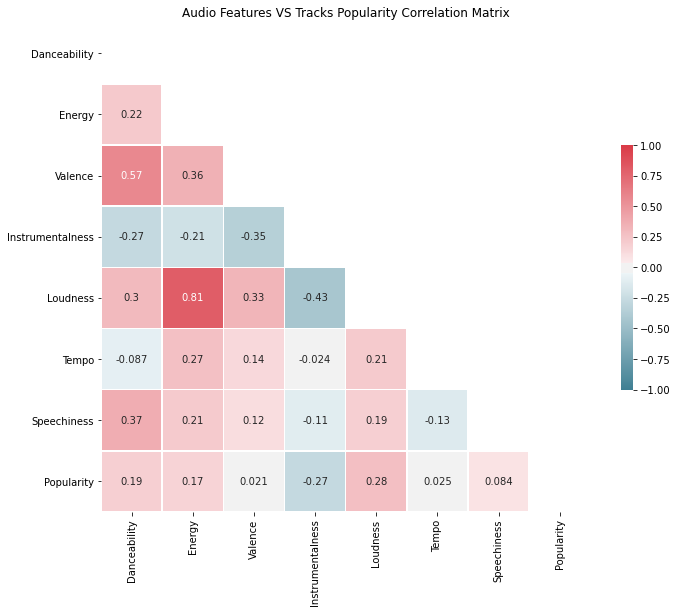

In [16]:
#Creating the correlation matrix using seaborn
audio_corr= audio_analysis.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(audio_corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(audio_corr,mask=mask, cmap=cmap,vmin=-1,vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True,)
plt.title('Audio Features VS Tracks Popularity Correlation Matrix')
plt.savefig("output/Correlation_Matrix.png")
plt.show()

Plotting some audio features regressions

In [17]:
# Defining a linear regression function improve the code efficency
def regression(x,y):  
    (slope,intercept,rvalue,pvalue,stderr)=st.linregress(x,y)
    regress_values= x*slope+intercept
    line_eq= "y=" + str(round(slope,3)) + "x+" + str(round(intercept,2))
    r_squared= rvalue**2
    return regress_values,line_eq,r_squared

Danceability VS Energy

The r-squared is : 0.04787747562064124


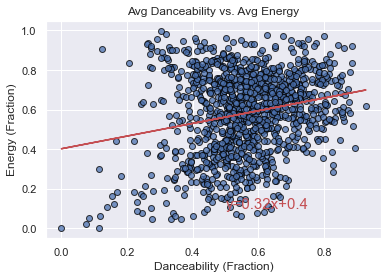

In [18]:
# setting seaborn format
sns.set(color_codes=True)
#Plotting scatter chart, line curve, line equation
danceability_energy= regression(audio_analysis["Danceability"], audio_analysis["Energy"])
plt.scatter(audio_analysis["Danceability"],audio_analysis["Energy"], marker="o",facecolor="b", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Danceability"],danceability_energy[0],"r-")
#Printing the line equation
plt.annotate(danceability_energy[1],(0.5,0.1), fontsize=15, color="r")
plt.xlabel("Danceability (Fraction)")
plt.ylabel("Energy (Fraction)")
plt.title("Avg Danceability vs. Avg Energy")
#Printing r-squared factor
print(f"The r-squared is : {danceability_energy[2]}")
plt.show()

Valence VS Energy

The r-squared is : 0.1279745932876356


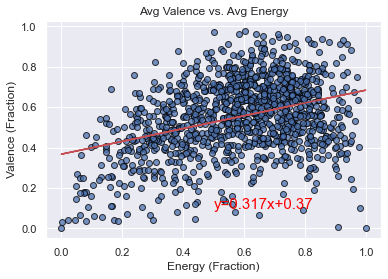

In [19]:
#Plotting scatter chart, line curve, line equation
energy_valence= regression(audio_analysis["Energy"], audio_analysis["Valence"])
plt.scatter(audio_analysis["Energy"],audio_analysis["Valence"], marker="o",facecolor="b", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Energy"],energy_valence[0],"r-")
#Printing the line equation
plt.annotate(energy_valence[1],(0.5,0.1), fontsize=15, color="red")
plt.xlabel("Energy (Fraction)")
plt.ylabel("Valence (Fraction)")
plt.title("Avg Valence vs. Avg Energy")
#Printing r-squared factor
print(f"The r-squared is : {energy_valence[2]}")
plt.show()

Loudness VS Energy

The r-squared is : 0.6580860288661683


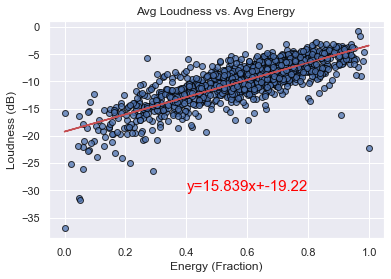

In [20]:
#Plotting scatter chart, line curve, line equation
energy_loudness= regression(audio_analysis["Energy"], audio_analysis["Loudness"])
plt.scatter(audio_analysis["Energy"],audio_analysis["Loudness"], marker="o",facecolor="b", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Energy"],energy_loudness[0],"r-")
#Printing the line equation
plt.annotate(energy_loudness[1],(0.4,-30), fontsize=15, color="red")
plt.xlabel("Energy (Fraction)")
plt.ylabel("Loudness (dB)")
plt.title("Avg Loudness vs. Avg Energy ")
#Printing r-squared factor
print(f"The r-squared is : {energy_loudness[2]}")
plt.show()

Danceability VS Valence

The r-squared is : 0.3265554298370026


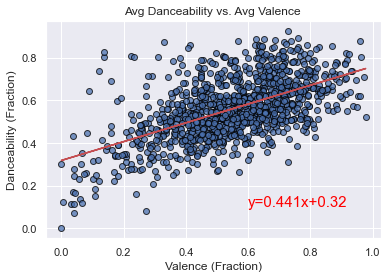

In [21]:
#Plotting scatter chart, line curve, line equation
valence_danceability= regression(audio_analysis["Valence"], audio_analysis["Danceability"])
plt.scatter(audio_analysis["Valence"],audio_analysis["Danceability"], marker="o",facecolor="b", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Valence"],valence_danceability[0],"r-")
#Printing the line equation
plt.annotate(valence_danceability[1],(0.6,0.1), fontsize=15, color="red")
plt.xlabel("Valence (Fraction)")
plt.ylabel("Danceability (Fraction)")
plt.title("Avg Danceability vs. Avg Valence ")
#Printing r-squared factor
print(f"The r-squared is : {valence_danceability[2]}")
plt.show()

Danceability VS Speechiness

The r-squared is : 0.1388455407774106


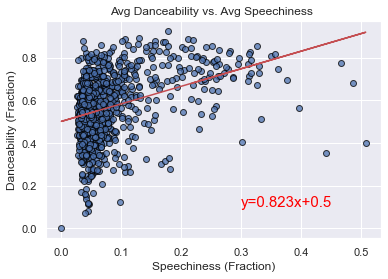

In [22]:
#Plotting scatter chart, line curve, line equation
speechiness_danceability= regression(audio_analysis["Speechiness"], audio_analysis["Danceability"])
plt.scatter(audio_analysis["Speechiness"],audio_analysis["Danceability"], marker="o",facecolor="b", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Speechiness"],speechiness_danceability[0],"r-")
#Printing the line equation
plt.annotate(speechiness_danceability[1],(0.3,0.1), fontsize=15, color="red")
plt.xlabel("Speechiness (Fraction)")
plt.ylabel("Danceability (Fraction)")
plt.title("Avg Danceability vs. Avg Speechiness ")
#Printing r-squared factor
print(f"The r-squared is : {speechiness_danceability[2]}")
plt.show()

Plotting features vs Popularity

The r-squared is : 0.04


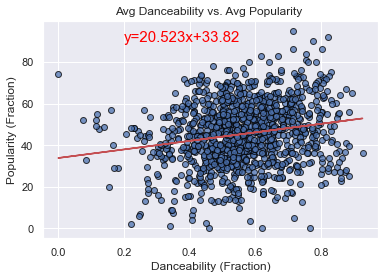

In [23]:
#Plotting scatter chart, line curve, line equation
danceability_popularity= regression(audio_analysis["Danceability"], audio_analysis["Popularity"])
plt.scatter(audio_analysis["Danceability"],audio_analysis["Popularity"], marker="o",facecolor="b", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Danceability"],danceability_popularity[0],"r-")
#Printing the line equation
plt.annotate(danceability_popularity[1],(0.2,90), fontsize=15, color="red")
plt.xlabel("Danceability (Fraction)")
plt.ylabel("Popularity (Fraction)")
plt.title("Avg Danceability vs. Avg Popularity ")
#Printing r-squared factor
print(f"The r-squared is : {round(danceability_popularity[2],2)}")
plt.savefig("Danceability_Popularity.png")
plt.show()

Including a multiple linear regression analysis

In [24]:
# multiple analysis for Danceability & Speechiness VS Popularity
X = audio_analysis[['Danceability','Speechiness']] # here we have 2 variables for multiple regression.
Y = audio_analysis['Popularity'] 
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     22.17
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           3.53e-10
Time:                        21:27:33   Log-Likelihood:                -4853.2
No. Observations:                1177   AIC:                             9712.
Df Residuals:                    1174   BIC:                             9728.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           33.9006      1.797     18.869   

r-squared: 0.04


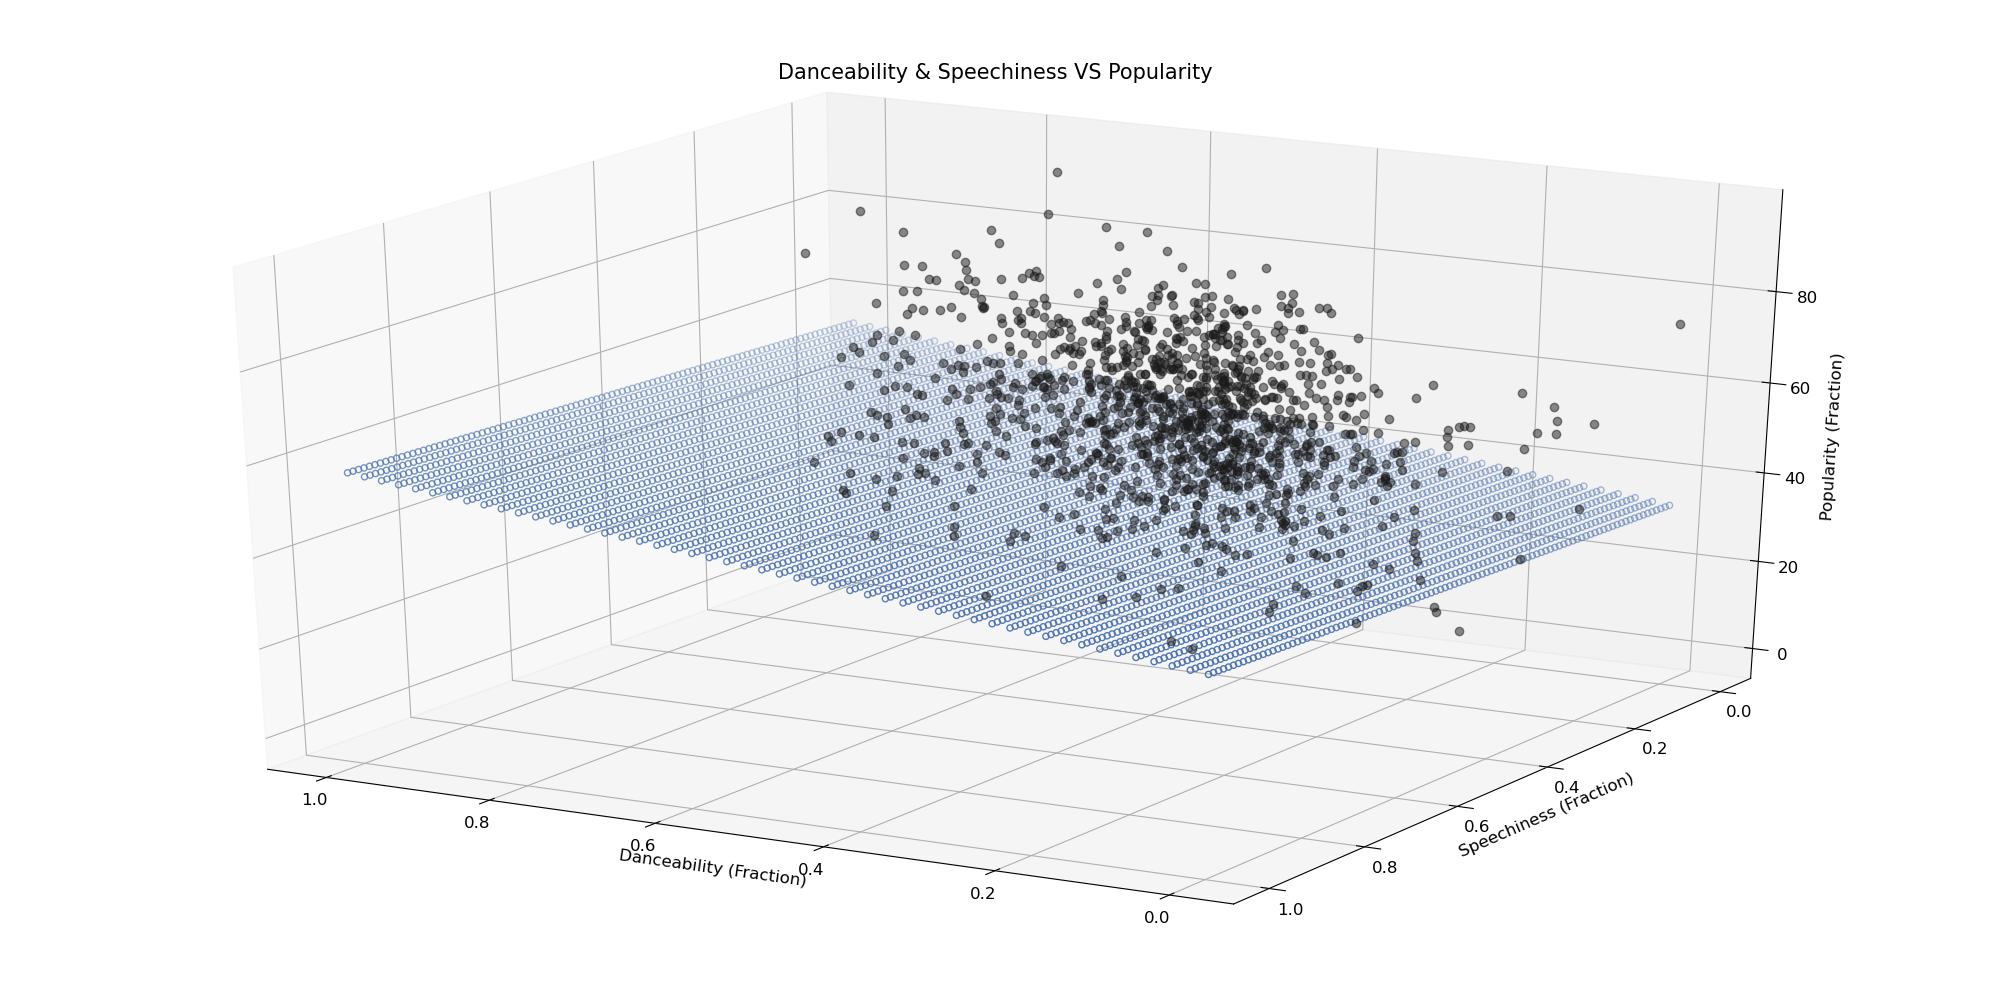

In [25]:
#Plotting 3D chart
X = audio_analysis[['Danceability','Speechiness']]
Y = audio_analysis['Popularity']

######################## Prepare model data point for visualization ###############################

x = audio_analysis['Danceability']
y = audio_analysis['Speechiness']
z = Y

x_pred = np.linspace(0, 1, 50) 
y_pred = np.linspace(0, 1, 100)  
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################# Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

# ############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='b')
ax.set_xlabel('Danceability (Fraction)', fontsize=12)
ax.set_ylabel('Speechiness (Fraction)', fontsize=12)
ax.set_zlabel('Popularity (Fraction)', fontsize=12)
ax.view_init(elev=25, azim=120)
ax.set_title("Danceability & Speechiness VS Popularity",fontsize=15)
plt.tick_params(axis="y",labelsize=12)
plt.tick_params(axis="z",labelsize=12)
plt.tick_params(axis="x",labelsize=12)
print(f'r-squared: {round(r2,2)}')
fig.tight_layout()
plt.savefig("output/FeatureVSPopularity_1.png")
plt.show()


In [26]:
# multiple analysis for Energy & Loudness VS popularity
X2 = audio_analysis[['Energy','Loudness']] # here we have 2 variables for multiple regression.
Y2 = audio_analysis['Popularity'] 
# with statsmodels
X2 = sm.add_constant(X2) # adding a constant
 
model2 = sm.OLS(Y2, X2).fit()
predictions = model2.predict(X2) 
 
print_model2 = model2.summary()
print(print_model2)

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     56.56
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           3.55e-24
Time:                        21:27:34   Log-Likelihood:                -4820.9
No. Observations:                1177   AIC:                             9648.
Df Residuals:                    1174   BIC:                             9663.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.4336      3.682     18.585      0.0

r-squared: 0.09


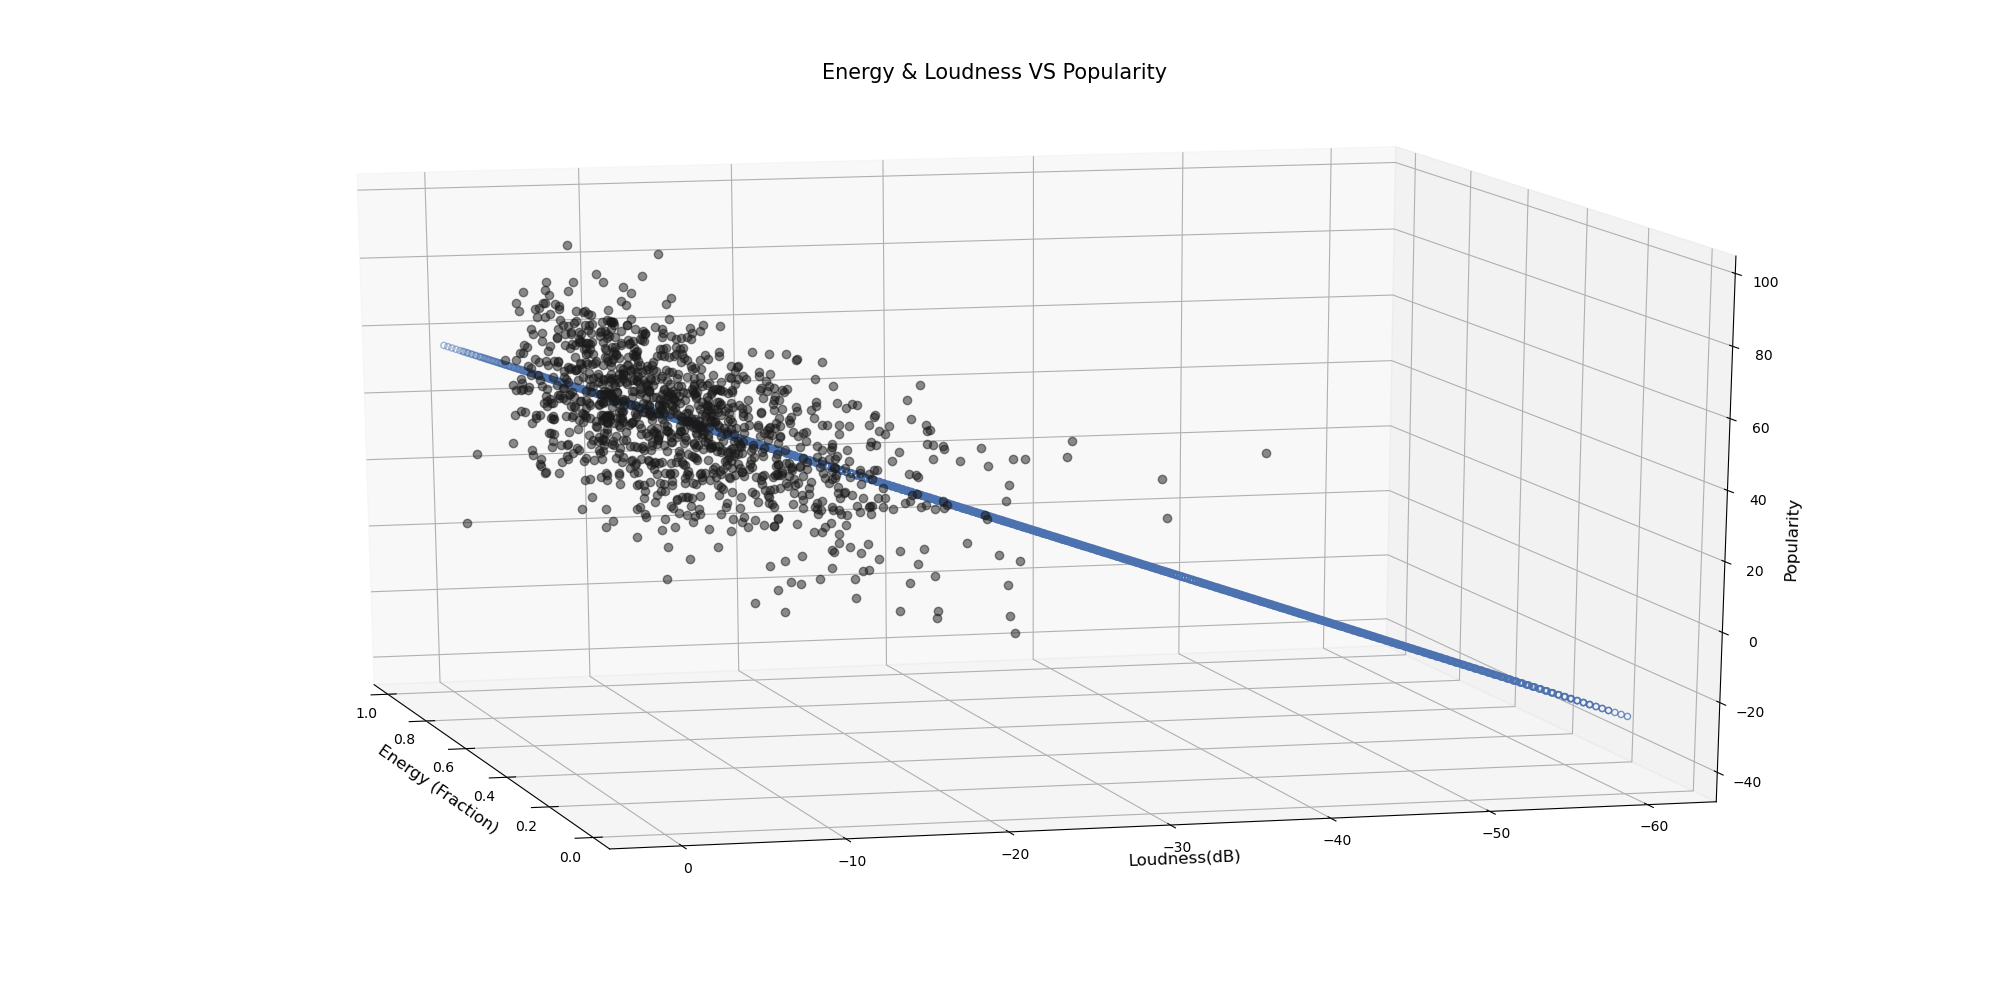

In [27]:
#Plotting 3d chart
X2 = audio_analysis[['Energy','Loudness']]
Y2= audio_analysis['Popularity']

######################## Prepare model data point for visualization ###############################

x2 = audio_analysis['Energy']
y2 = audio_analysis['Loudness']
z2 = Y2

x2_pred = np.linspace(0, 1, 50) 
y2_pred = np.linspace(-60, 0, 50)  
xx2_pred, yy2_pred = np.meshgrid(x2_pred, y2_pred)
model_viz2 = np.array([xx2_pred.flatten(), yy2_pred.flatten()]).T

################################################# Train #############################################

ols2 = linear_model.LinearRegression()
model2 = ols2.fit(X2, Y2)
predicted2 = model2.predict(model_viz2)

# ############################################## Evaluate ############################################

r2_2 = model2.score(X2, Y2)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(111, projection='3d')
ax.plot(x2, y2, z2, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(xx2_pred.flatten(), yy2_pred.flatten(), predicted2, facecolor=(0,0,0,0), s=20, edgecolor='b')
ax.set_xlabel('Energy (Fraction)', fontsize=12)
ax.set_ylabel('Loudness(dB)', fontsize=12)
ax.set_zlabel('Popularity', fontsize=12)
ax.view_init(elev=15, azim=165)
ax.set_title("Energy & Loudness VS Popularity", fontsize= 15)
print(f'r-squared: {round(r2_2,2)}')
fig.tight_layout()
plt.savefig("output/FeatureVSPopularity_2.png")
plt.show()

Optional analysis: Sorting by Popularity and selecting Top 100 Tracks

In [28]:
top_100_tracks= tracks_df.sort_values("Popularity", ascending= False)
top_100_tracks= tracks_df.head(100)
top_100_tracks

,Artist,Artist ID,Tracks,Track ID,Release Date,Track Duration,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Here Comes The Sun - Remastered 2009,6dGnYIeXmHdcikdzNNDMm2,1969-09-26,185733,83,0.557,0.540,9.0,-10.484,1.0,0.0347,0.0339,0.002480,0.1790,0.394,129.171
1,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Come Together - Remastered 2009,2EqlS6tkEnglzr7tkKAAYD,1969-09-26,259946,78,0.533,0.376,9.0,-11.913,0.0,0.0393,0.0302,0.248000,0.0926,0.187,165.007
2,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Let It Be - Remastered 2009,7iN1s7xHE4ifF5povM6A48,1970-05-08,243026,78,0.443,0.403,0.0,-8.339,1.0,0.0322,0.6310,0.000000,0.1110,0.410,143.462
3,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Yesterday - Remastered 2009,3BQHpFgAp4l80e1XslIjNI,1965-08-06,125666,77,0.332,0.179,5.0,-11.830,1.0,0.0326,0.8790,0.000000,0.0886,0.315,96.529
4,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Hey Jude - Remastered 2015,0aym2LBJBk9DAYuHHutrIl,2000-11-13,425653,76,0.386,0.607,10.0,-7.700,1.0,0.0261,0.0112,0.000014,0.0880,0.532,147.207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Jimi Hendrix,776Uo845nYHJpNaStv1Ds4,The Wind Cries Mary,5H6Jp0syB5yEPk7SWYdlmk,1967-05-12,200733,64,0.499,0.495,5.0,-10.508,1.0,0.0501,0.3480,0.028600,0.2000,0.339,80.086
96,Jimi Hendrix,776Uo845nYHJpNaStv1Ds4,Foxey Lady,23MrkN7g6Q5U7GLIxNHN1B,1967-05-12,198773,62,0.507,0.847,1.0,-5.987,0.0,0.0411,0.0751,0.237000,0.3720,0.566,98.096
97,Jimi Hendrix,776Uo845nYHJpNaStv1Ds4,Castles Made of Sand,3qebSLgUwaEqbwCM5sj5Kh,1967-12-01,168920,62,0.461,0.714,11.0,-9.159,0.0,0.3130,0.5040,0.017100,0.6840,0.454,94.372
98,Jimi Hendrix,776Uo845nYHJpNaStv1Ds4,Crosstown Traffic,1ntxpzIUbSsizvuAy6lTYY,1968-10-25,146573,60,0.486,0.963,0.0,-5.586,0.0,0.1290,0.2480,0.000002,0.1580,0.533,113.133


The r-squared is : 0.11587849291304726


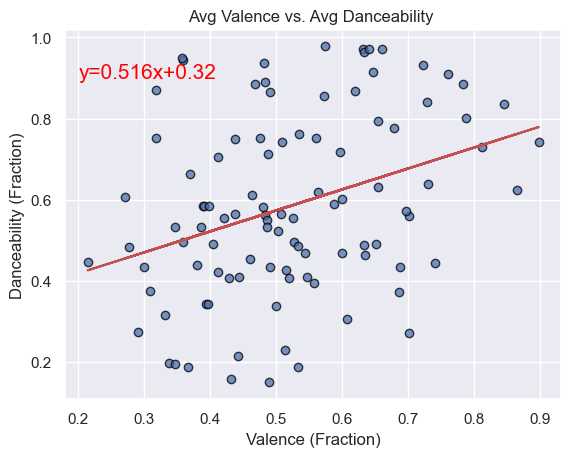

In [29]:
#seaborn format
sns.set(color_codes=True)
#Plotting scatter chart, line curve, line equation
danceability_valence_100= regression(top_100_tracks["Danceability"], top_100_tracks["Valence"])
plt.scatter(top_100_tracks["Danceability"],top_100_tracks["Valence"], marker="o",facecolor="b", edgecolor="black", alpha= 0.75)
plt.plot(top_100_tracks["Danceability"],danceability_valence_100[0],"r-")
#Printing the line equation
plt.annotate(danceability_valence_100[1],(0.2,0.9), fontsize=15, color="red")
plt.xlabel("Valence (Fraction)")
plt.ylabel("Danceability (Fraction)")
plt.title("Avg Valence vs. Avg Danceability ")
#Printing r-squared factor
print(f"The r-squared is : {danceability_valence_100[2]}")
plt.show()

Optional Analysis: Sorting by Artist Popularity and selecting Top 100 of Artists

In [30]:
top_100_artists= artist_df.sort_values("Artist_Popularity",ascending= False)
top_100_artists= top_100_artists.head(100)

The r-squared is : 0.6085710536469282


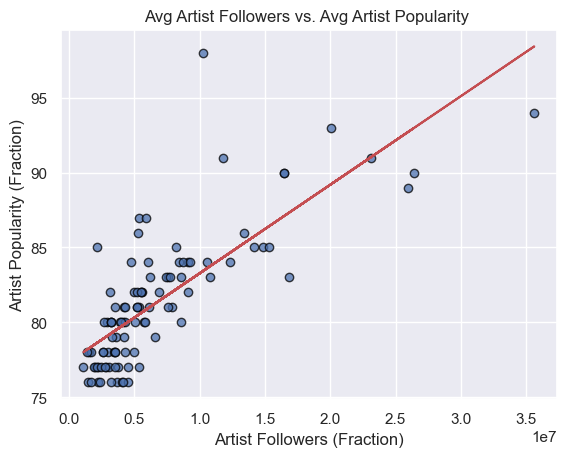

In [31]:
#Seaborn formatt
sns.set(color_codes=True)
#Plotting scatter chart, line curve, line equation
followers_popularity= regression(top_100_artists["Artist_Followers"], top_100_artists["Artist_Popularity"])
plt.scatter(top_100_artists["Artist_Followers"],top_100_artists["Artist_Popularity"], marker="o",facecolor="b", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(top_100_artists["Artist_Followers"],followers_popularity[0],"r-")
#Printing the line equation
# plt.annotate(followers_popularity[1],(2.01e7,78), fontsize=15, color="red")
plt.xlabel("Artist Followers (Fraction)")
plt.ylabel("Artist Popularity (Fraction)")
plt.title("Avg Artist Followers vs. Avg Artist Popularity ")
#Printing r-squared factor
print(f"The r-squared is : {followers_popularity[2]}")
plt.show()

Artists Main Genre Analysis

In [32]:
#cleaning NaN values
genre_analysis= artist_df.dropna().copy()

In [33]:
# Grouping by "Main Genre"
grouped_genre= genre_analysis.groupby("Main Genre")
artist_by_genre = grouped_genre.agg(Artist_Count= pd.NamedAgg(column="Main Genre", aggfunc="count"), Artist_Avg_Popularity= pd.NamedAgg(column="Artist_Popularity", aggfunc="mean"),
                                   Artist_Avg_Followers= pd.NamedAgg(column="Artist_Followers", aggfunc="mean"))
#Descendig sorting by "Artist_Count"
popular_main_genre= artist_by_genre.sort_values("Artist_Count", ascending=False)
# Selecting the 20 top genres based on artist count
main_genre_popularity= popular_main_genre.head(20).copy()
main_genre_popularity["Artist_Avg_Followers"]=main_genre_popularity["Artist_Avg_Followers"]/1000
main_genre_popularity=main_genre_popularity.reset_index()
main_genre_popularity

,Main Genre,Artist_Count,Artist_Avg_Popularity,Artist_Avg_Followers
0,alternative rock,103,58.330097,801.636097
1,album rock,87,69.574713,2123.595115
2,adult standards,73,63.232877,621.711479
3,brill building pop,31,54.322581,221.735903
4,art rock,30,56.833333,334.921300
5,art pop,25,56.840000,362.970280
6,alternative dance,24,59.791667,533.214750
7,bebop,24,53.916667,271.122833
8,dance pop,23,73.608696,3560.931565
9,alternative metal,23,67.739130,2044.034783


Generating a bar chart to compare Artists Count and Number of Followers VS Artist's Main Genre

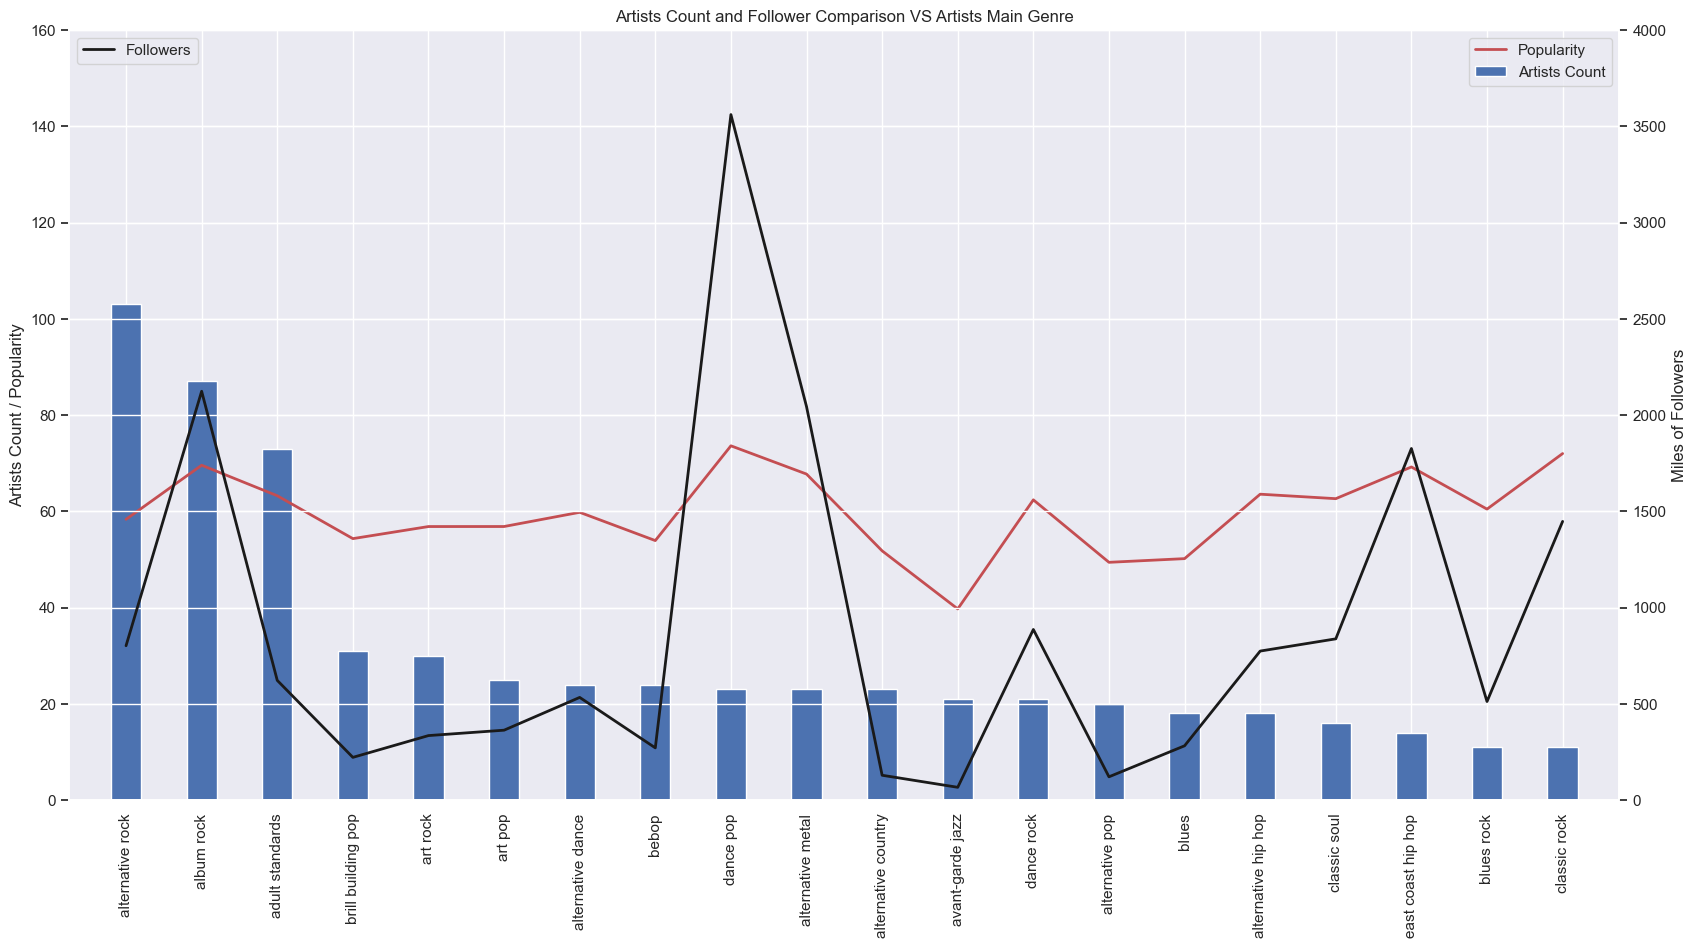

In [34]:
sns.set(color_codes=True)
# Create matplotlib figure
fig = plt.figure(figsize=(20,10)) 
# Create matplotlib axes
ax = fig.add_subplot(111) 
# Create another axes that shares the same x-axis as ax.
ax2 = ax.twinx()

# Bars width
width = 0.4

#Generating bar and line plots with pandas
g1=main_genre_popularity.Artist_Count.plot(kind='bar', color='b', ax=ax, width=width, align='center', label = 'Artists Count')
g2=main_genre_popularity.Artist_Avg_Followers.plot(color='k', ax=ax2, label='Followers', linewidth=2)
g3=main_genre_popularity.Artist_Avg_Popularity.plot(color='r',ax=ax, label='Popularity', linewidth=2)
#Styling charts
x_axis= np.arange(0,20,1)
labels= (main_genre_popularity['Main Genre']).tolist()
ax.set_ylabel('Artists Count / Popularity')
ax.set_xlabel('')
ax.set_title('Artists Count and Follower Comparison VS Artists Main Genre')
ax2.set_ylabel('Miles of Followers')
tick_locations=[value for value in x_axis]
ax.set_xticks(tick_locations)
ax.set_xticklabels(labels,rotation=90)
ax.legend(loc="upper right")
plt.xlim(-0.75,len(x_axis)-0.25)
ax2.set_ylim(0,4000)
ax.set_ylim(0,160)
ax2.legend(loc='upper left')
plt.savefig("output/ArtistCount_Followers&Popularity.png")
plt.show()

In [35]:
#Matching with the Top 10 artists
most_popular_genre= genre_analysis.sort_values("Artist_Popularity", ascending=False)
most_popular_genre.head(10)

,Artist Name,Artist ID,Artist_Popularity,Artist_Followers,Artist Genre,Main Genre
499,Travis,0Y5tJX1MQlPlqiwlOH1tJY,98.0,10245569.0,rap,rap
70,Eminem,7dGJo4pcD2V6oG8kP0tJRR,94.0,35609939.0,"detroit hip hop,hip hop,rap",detroit hip hop
250,X,15UsOTVnJzReFVN1VCnxy4,93.0,20049209.0,"emo rap,miami hip hop",emo rap
467,Beyonce,6vWDO969PvNqNYHIOW5v0m,91.0,23100218.0,"dance pop,pop,r&b",dance pop
123,Kanye West,5K4W6rqBFWDnAN6FQUkS6x,91.0,11788938.0,"chicago rap,hip hop,rap",chicago rap
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,90.0,16451967.0,"beatlesque,british invasion,classic rock,merse...",beatlesque
111,Queen,1dfeR4HaWDbWqFHLkxsg1d,90.0,26397943.0,"glam rock,rock",glam rock
489,The Beat,3WrFJ7ztbogyGnTHbHJFl2,90.0,16451967.0,"beatlesque,british invasion,classic rock,merse...",beatlesque
135,Coldplay,4gzpq5DPGxSnKTe4SA8HAU,89.0,25982478.0,"permanent wave,pop",permanent wave
289,Snoop Doggy Dogg,7hJcb9fa4alzcOq3EaNPoG,87.0,5868563.0,"g funk,gangster rap,hip hop,rap,west coast rap",g funk


Multiple Genres per Artist Analysis

In [36]:
# Calculating how many genres each artist has
genre_analysis["Genre Count"]= genre_analysis['Artist Genre'].str.count(',').add(1)
genre_analysis.head()

,Artist Name,Artist ID,Artist_Popularity,Artist_Followers,Artist Genre,Main Genre,Genre Count
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,90.0,16451967.0,"beatlesque,british invasion,classic rock,merse...",beatlesque,6
1,The Rolling Stones,22bE4uQ6baNwSHPVcDxLCe,84.0,8696874.0,"album rock,british invasion,classic rock,rock",album rock,4
2,Bob Dylan,74ASZWbe4lXaubB36ztrGX,79.0,4233870.0,"album rock,classic rock,country rock,folk,folk...",album rock,9
3,David Bowie,0oSGxfWSnnOXhD2fKuz2Gy,82.0,5539518.0,"album rock,art rock,classic rock,dance rock,gl...",album rock,8
4,Led Zeppelin,36QJpDe2go2KgaRleHCDTp,82.0,9079479.0,"album rock,classic rock,hard rock,rock",album rock,4


 Correlation Factor is : -0.19


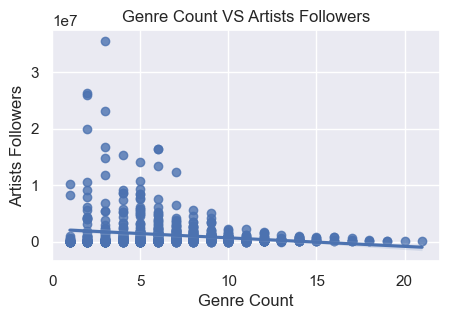

In [37]:
sns.set(color_codes=True)
f, ax = plt.subplots(figsize=(5, 3))
sns.regplot(x="Genre Count", y="Artist_Followers", data=genre_analysis, color="b",ax=ax);
plt.xlim(0,22)
plt.title("Genre Count VS Artists Followers")
plt.xlabel('Genre Count')
plt.ylabel('Artists Followers')
corr_gc_followers= st.pearsonr(genre_analysis["Genre Count"],genre_analysis["Artist_Followers"])
print(f' Correlation Factor is : {round(corr_gc_followers[0],2)}')
plt.savefig("output/GenreCount_ArtistsFollowers.png")

 Correlation Factor is : -0.07


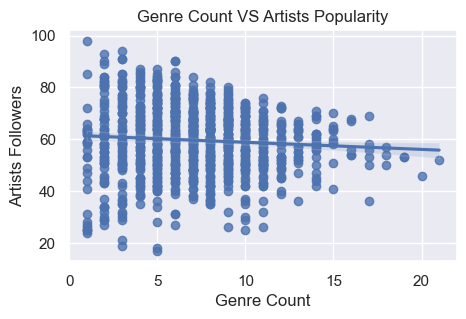

In [38]:
f, ax = plt.subplots(figsize=(5, 3))
sns.regplot(x="Genre Count", y="Artist_Popularity", data=genre_analysis, color="b",ax=ax);
plt.xlim(0,22)
plt.title("Genre Count VS Artists Popularity")
plt.xlabel('Genre Count')
plt.ylabel('Artists Followers')
corr_gc_populariy= st.pearsonr(genre_analysis["Genre Count"],genre_analysis["Artist_Popularity"])
print(f' Correlation Factor is : {round(corr_gc_populariy[0],2)}')
plt.savefig("output/GenreCount_ArtistPopularity.png")